In [1]:
import numpy as np
import pandas as pd
import random

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

import re
import warnings

warnings.filterwarnings("ignore")

In [2]:
def write_excel(filename,sheetname,dataframe):
    with pd.ExcelWriter(filename, engine='openpyxl', mode='a') as writer: 
        workBook = writer.book
        try:
            workBook.remove(workBook[sheetname])
        except:
            print("Worksheet does not exist")
        finally:
            dataframe.to_excel(writer, sheet_name=sheetname,index=False)

In [3]:
file_path = 'ML_test.xlsx'

In [4]:
# Read it as excel since data is not hierarchal (nested) and is tabular
df = pd.read_excel(file_path)

# Initial Data Exploration

#### General Check 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Columns: 117 entries, t to p111
dtypes: float64(117)
memory usage: 40.3 KB


In [6]:
df.head()

t     H1      H2        cx         cy         p0         p1  \
0  0.000000  0.010  0.0100  7.582424  47.078819 -29.248287 -29.548420   
1  2.226667  0.029  0.0434  6.674054  21.731815 -27.098244 -27.399952   
2  4.453333  0.048  0.0768  6.314854  14.022467 -24.618023 -24.892763   
3  6.680000  0.067  0.1102  6.144211   9.135772 -22.664440 -22.917286   
4  8.906667  0.086  0.1436  6.006707   7.317819 -21.379242 -21.603153   

          p2         p3         p4  ...       p102       p103       p104  \
0 -29.848576 -30.161907 -30.487290  ...  -0.499053  -3.615058  -6.728691   
1 -27.699362 -28.011700 -28.335566  ... -31.754108 -31.697620 -31.559334   
2 -25.174314 -25.468277 -25.773235  ... -30.965536 -30.321342 -29.693792   
3 -23.178268 -23.449903 -23.732052  ... -30.316986 -29.369415 -28.479053   
4 -21.843924 -22.095177 -22.355556  ... -27.585220 -26.688946 -25.888054   

        p105       p106       p107       p108       p109       p110       p111  
0  -9.840231 -12.945290 -16.044070 -19.155024 -22.282547 -25.340107 -28.254690  
1 -31.346674 -31.065903 -30.732502 -30.352780 -29.932987 -29.477518 -28.989510  
2 -29.085705 -28.499702 -27.933704 -27.387848 -26.861580 -26.353520 -25.864550  
3 -27.678265 -26.911200 -26.184065 -25.506124 -24.872929 -24.283000 -23.743816  
4 -25.212877 -24.509972 -23.886827 -23.322418 -22.808016 -22.342941 -21.936907  

[5 rows x 117 columns]

In [7]:
# This line checks for any missing values in any of the entries across the dataframe, returning False means no missing data.
df.isna().any().any()

False

In [8]:
df.describe()

t         H1         H2             cx             cy  \
count  44.000000  44.000000  44.000000      44.000000      44.000000   
mean   45.649697   0.103705   0.176686   -3050.161903   -5317.956781   
std    26.337202   0.059999   0.070673   20426.942999   35503.035656   
min     0.000000   0.010000   0.010000 -135464.135000 -235464.135000   
25%    24.426667   0.048000   0.124900       5.562536       5.413115   
50%    46.116667   0.105000   0.174700       5.821165       8.475000   
75%    67.306667   0.143000   0.231150       6.496271      14.050889   
max    89.640000   0.200000   0.344000     999.999000     999.999000   

              p0         p1         p2         p3         p4  ...       p102  \
count  44.000000  44.000000  44.000000  44.000000  44.000000  ...  44.000000   
mean  -21.916185 -22.138999 -22.369536 -22.611593 -22.863978  ... -24.516974   
std     3.589102   3.636556   3.682456   3.730023   3.777604  ...   6.175394   
min   -29.713543 -30.070845 -30.337730 -30.620487 -30.919304  ... -41.617897   
25%   -24.448650 -24.713964 -24.994997 -25.288432 -25.592699  ... -28.123251   
50%   -21.071825 -21.302381 -21.533135 -21.774301 -22.023657  ... -24.587888   
75%   -18.892438 -19.065226 -19.246260 -19.449176 -19.659931  ... -21.320383   
max   -17.444841 -17.574516 -17.724080 -17.884846 -18.055370  ...  -0.499053   

            p103       p104       p105       p106       p107       p108  \
count  44.000000  44.000000  44.000000  44.000000  44.000000  44.000000   
mean  -24.070074 -23.689967 -23.366797 -23.078160 -22.823060 -22.594059   
std     5.656852   5.200299   4.807383   4.471211   4.209194   4.014654   
min   -39.743275 -38.184025 -36.904694 -35.780308 -34.973980 -34.271980   
25%   -27.557865 -27.025486 -26.521403 -25.975676 -25.363644 -24.799237   
50%   -24.031208 -23.390291 -22.831523 -22.295158 -21.809748 -21.481335   
75%   -20.792606 -20.381514 -20.095169 -19.890764 -19.696860 -19.386597   
max    -3.615058  -6.728691  -9.840231 -12.945290 -16.044070 -17.041042   

            p109       p110       p111  
count  44.000000  44.000000  44.000000  
mean  -22.390634 -22.205302 -22.039269  
std     3.896337   3.858245   3.893264  
min   -33.728584 -33.329220 -33.067398  
25%   -24.512547 -24.283000 -24.077929  
50%   -21.189732 -20.918478 -20.691067  
75%   -19.466207 -19.456167 -19.291675  
max   -17.311602 -17.454647 -17.373947  

[8 rows x 117 columns]

In [9]:
# Check for duplicates in across rows.
df.duplicated().any()

False

In [10]:
# Check for duplicates in across columns.
duplicates_in_row = df.apply(lambda row: row.duplicated(), axis=1)
duplicates_in_row.any()

t       False
H1      False
H2       True
cx      False
cy       True
        ...  
p107    False
p108    False
p109    False
p110    False
p111    False
Length: 117, dtype: bool

A duplicated value is seen in Cy with Cx, which will be investigated further later on. 


**Note:** While H2 is duplicated, this is the input variable that is being adjusted during the experiment which can sometimes be set equal to H1.

### Investigatory measures to check for **outliers** in C:

In [11]:
# Making a visualisation function that graphs a scatterplot and a boxplot
def InvestigateScatterAndBox(C_component,direction,color):
    
    C_component.reset_index()
    
    fig, axs = plt.subplots(2, 1, figsize=(14, 8))
    
    plt.subplot(211)
    sns.scatterplot(x=C_component.index, y=C_component,color =color)
    if direction == 0:
        
        plt.title("Scatter Plot for Aero Pressure in the X-Direction")
        plt.xlabel('Measurement')
        plt.ylabel('C_x', rotation=0)
        plt.tight_layout()
        
        plt.subplot(212)
        plt.title('Box Plot of Cx')
        sns.boxplot(data=C_component,
            whiskerprops = dict(color=color, linewidth=5.0),
            capprops = dict(color=color, linewidth=5.0)
            )
        
    elif direction == 1:
        plt.title("Scatter Plot for Aero Pressure in the Y-Direction")
        plt.xlabel('Measurement')
        plt.ylabel('C_y', rotation=0)
        plt.tight_layout()
        
        plt.subplot(212)
        plt.title('Box Plot of Cy')
        sns.boxplot(data=C_component,
            whiskerprops = dict(color=color, linewidth=5.0),
            capprops = dict(color=color, linewidth=5.0)
            )
    else:
        print("Provide a valid component: 0 for horizontal and 1 for vertical")
    
    plt.show()

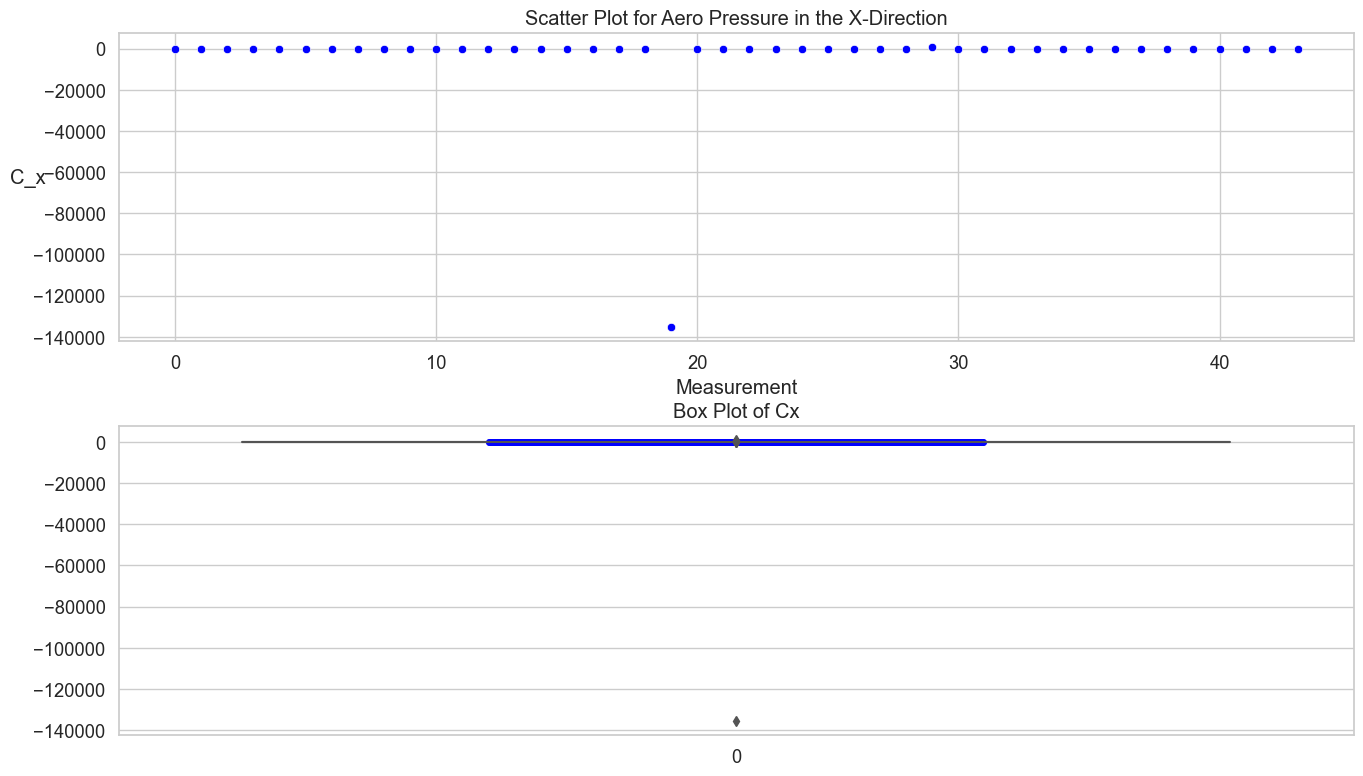

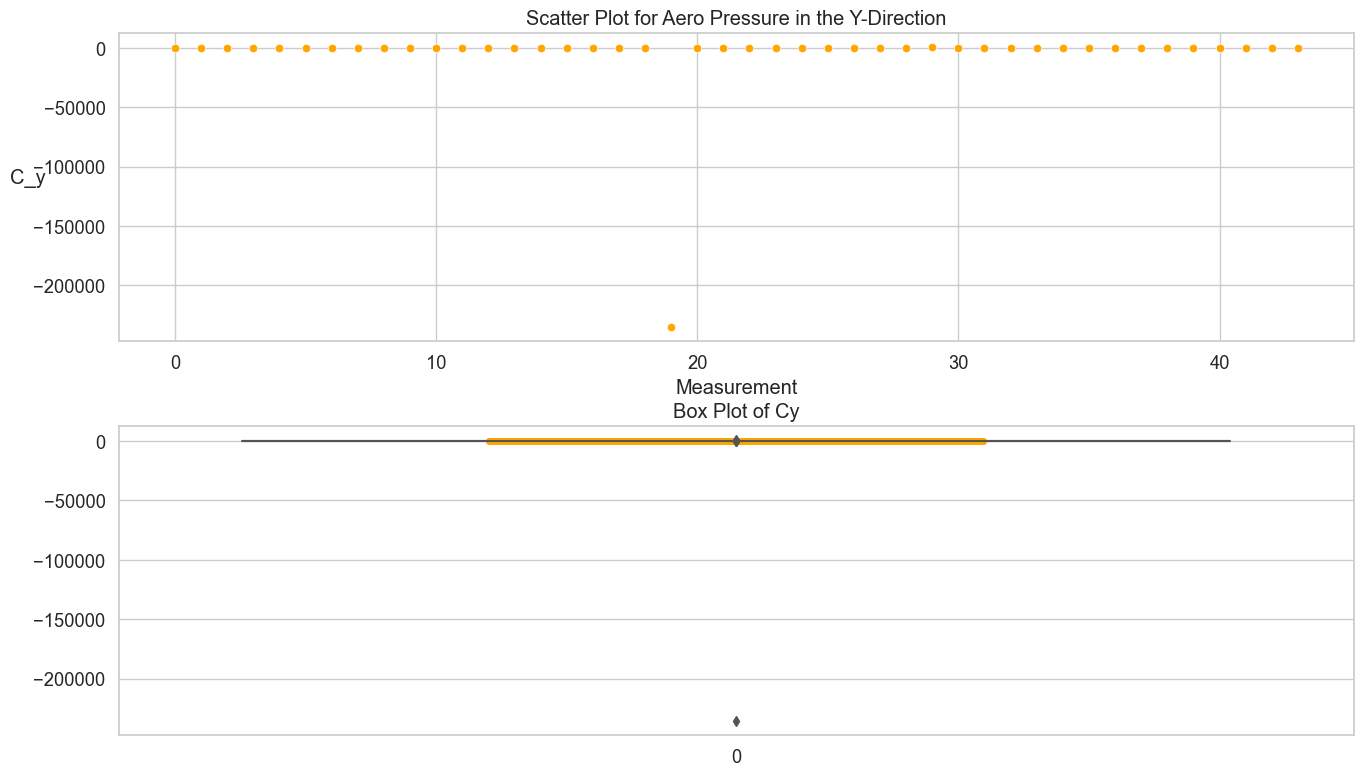

In [12]:
# Create scatterplot and boxplot for Cx
InvestigateScatterAndBox(df['cx'],0,'blue')

# Doing the same for Cy
InvestigateScatterAndBox(df['cy'],1,'orange')

Initial Investigaton showcases there is a potential extreme **Outlier** in both the Cx and Cy reading in the same instance that can be seen in the scatter plots: 


The Boxplot shows a potential second outlier other than the extreme one, which after noticing the boxplot, can be inferred to be visible in the scatterplot but with minimal significance due to the scale of the plot.

a Z-score will be performed as a statistical confirmation of the first potential outlier.


In [13]:
from scipy.stats import zscore

In [14]:
cx_z_scores = zscore(df['cx'])
cy_z_scores = zscore(df['cy'])

In [15]:
# Identify outliers using a threshold (e.g., 3 standard deviations)
cx_outliers = (abs(cx_z_scores) > 3)
cy_outliers = (abs(cy_z_scores) > 3)

In [16]:
print("Outlier(s) indices in Cx: ", df.index[cx_outliers])
print("Outlier(s) indices in Cy: ",df.index[cy_outliers])

outlier_index = df.index[cx_outliers][0]
display(df[cy_outliers])
print("Z-Score of the Outlier in Cx: ", cx_z_scores[outlier_index])
print("Z-Score of the Outlier in Cy: ", cy_z_scores[outlier_index])

Outlier(s) indices in Cx:  Int64Index([19], dtype='int64')
Outlier(s) indices in Cy:  Int64Index([19], dtype='int64')


t     H1     H2          cx          cy         p0         p1  \
19  41.366667  0.105  0.177 -135464.135 -235464.135 -20.486725 -20.691147   

          p2        p3         p4  ...       p102       p103       p104  \
19 -20.91265 -21.14443 -21.386242  ... -24.969116 -24.225517 -23.568737   

         p105       p106       p107       p108       p109       p110  \
19 -22.996239 -22.460562 -21.984423 -21.563694 -21.189732 -20.864037   

         p111  
19 -20.593584  

[1 rows x 117 columns]

Z-Score of the Outlier in Cx:  -6.557262206847689
Z-Score of the Outlier in Cy:  -6.557380566759251


It can be seen that there is one instance where the readings Z-score is -6.56 in both the Cx measurement and the Cy measurement with readings -135464 and -235464 respectively. It can be noticed that in practice, this measurements are actually much more extreme but since they are so high, they drive the sample mean higher so it is understated here.


This _outlier_ could have happened for a number of reasons:

 - Since both Cx and Cy are measured by a single gauge balance, it is probably that these readings are just mismeasurements from the balance.
 
 - There is also a possibility of an error in the wind tunnel fan itself giving abnormal rise in the pressure recorded by the balance. However, there is multiple reasons rendering this possibility to be highly unlikely:
     - an error like that would likely have been detected in the subsequent measurements of the balance.
     - Furthermore, since the recordings are negative, it would have to mean that suddenly there was pressure exerted on the prototype from the -ve Y-direction (and -ve X-direction), meaning a a force coming from the floor.
     - The magnitude of the pressure values (if in kPa) could be physically improbable.
 
 

Thus, this data point will be removed as it is assumed to be a measurement error and does not provide valuable information.

**Note**: It is also always important to further investigate the source of the outlier, either with experts regarding the balance measurements, or investigating past Cx and Cy data from previous wind tunnel testings to check if a measurement of similar characteristics have been recorded before.


In [17]:
'''Since the dataset is small, new dataframes will be created when updating as it is not computationally expensive
                    and it keeps records of the original data in case of need. '''

outlier1_removed_df = df.drop(outlier_index).copy()

#### Now, a better visual investigation of the other potential outlier will be performed:

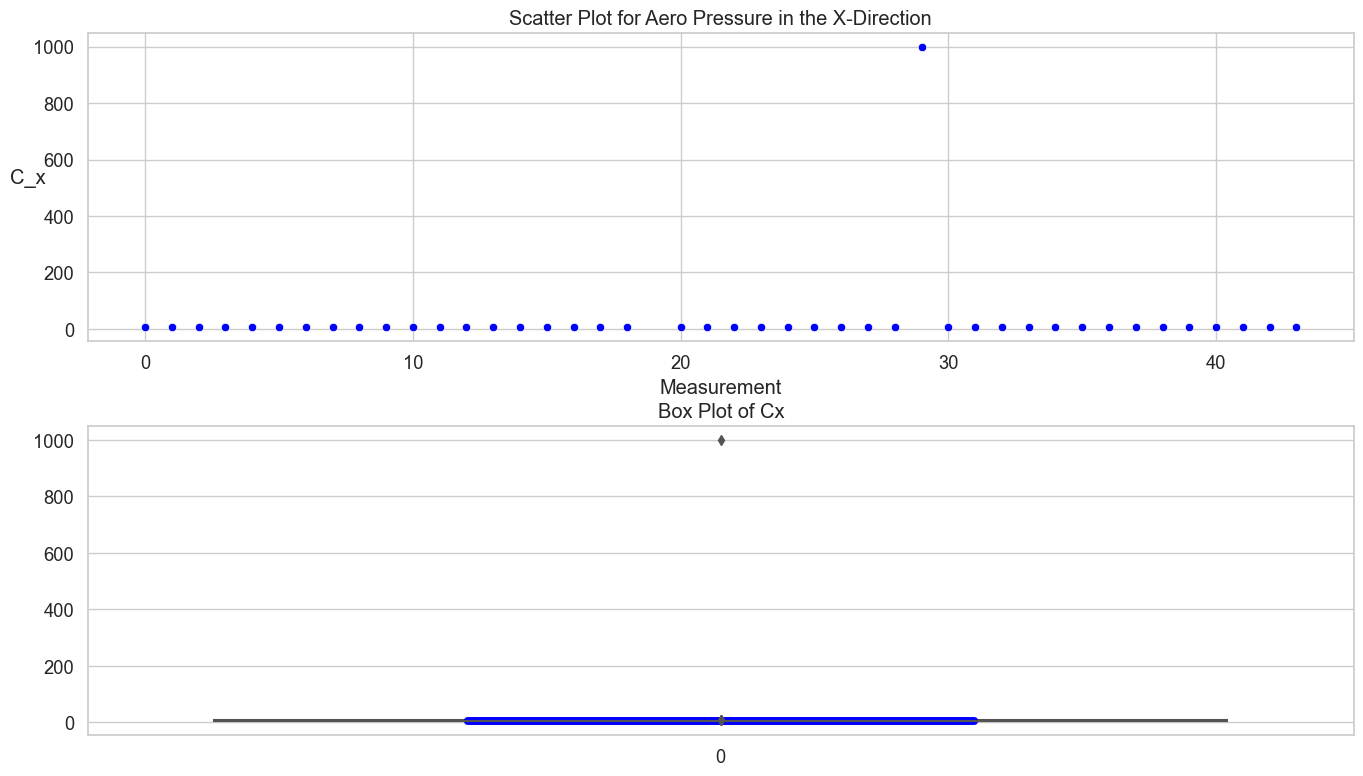

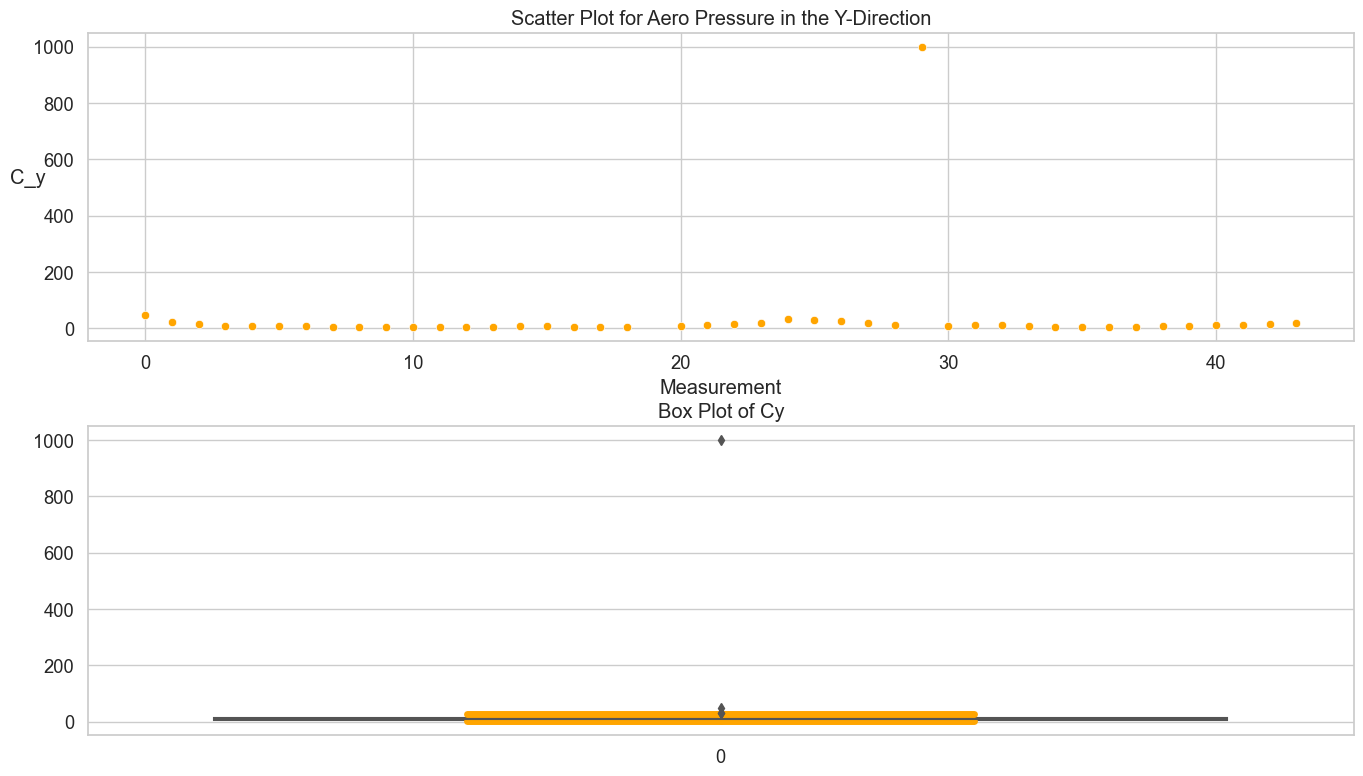

In [18]:
InvestigateScatterAndBox(outlier1_removed_df['cx'],0,'blue')

InvestigateScatterAndBox(outlier1_removed_df['cy'],1,'orange')

It can be seen from the graphs above that there are one instance of a recording of Cx and Cy that could be a potential **Outlier**.

#### Performing a **Z-score** calculation:

In [19]:
cx2_z_scores = zscore(outlier1_removed_df['cx'])
cy2_z_scores = zscore(outlier1_removed_df['cy'])

# Identify outliers using a threshold (e.g., 3 standard deviations)
cx2_outliers = (abs(cx2_z_scores) > 3)
cy2_outliers = (abs(cx2_z_scores) > 3)

print("Outlier(s) Z-score: ", cx2_z_scores[cx2_z_scores>3])
print("Outlier(s) Z-score: ",cx2_z_scores[cx2_z_scores>3])

outlier_index = outlier1_removed_df.index[cx2_outliers][0]
display(outlier1_removed_df[cy2_outliers])

Outlier(s) Z-score:  29    6.480651
Name: cx, dtype: float64
Outlier(s) Z-score:  29    6.480651
Name: cx, dtype: float64


t     H1      H2       cx       cy        p0         p1  \
29  61.366667  0.067  0.1102  999.999  999.999 -22.66444 -22.917286   

           p2         p3         p4  ...       p102       p103       p104  \
29 -23.178268 -23.449903 -23.732052  ... -30.316986 -29.369415 -28.479053   

         p105     p106       p107       p108       p109    p110       p111  
29 -27.678265 -26.9112 -26.184065 -25.506124 -24.872929 -24.283 -23.743816  

[1 rows x 117 columns]

It can be seen from the above results that there is an instance of a recording of **999.999** in both both X and Y direction (the duplicated recording).

#### Investigating the range of values of **Cx** and **Cy**:

In [20]:
outlier2_index = outlier1_removed_df.index[cx2_outliers]
outlier2_removed_df = outlier1_removed_df.drop(outlier2_index).copy().reset_index(drop=True)

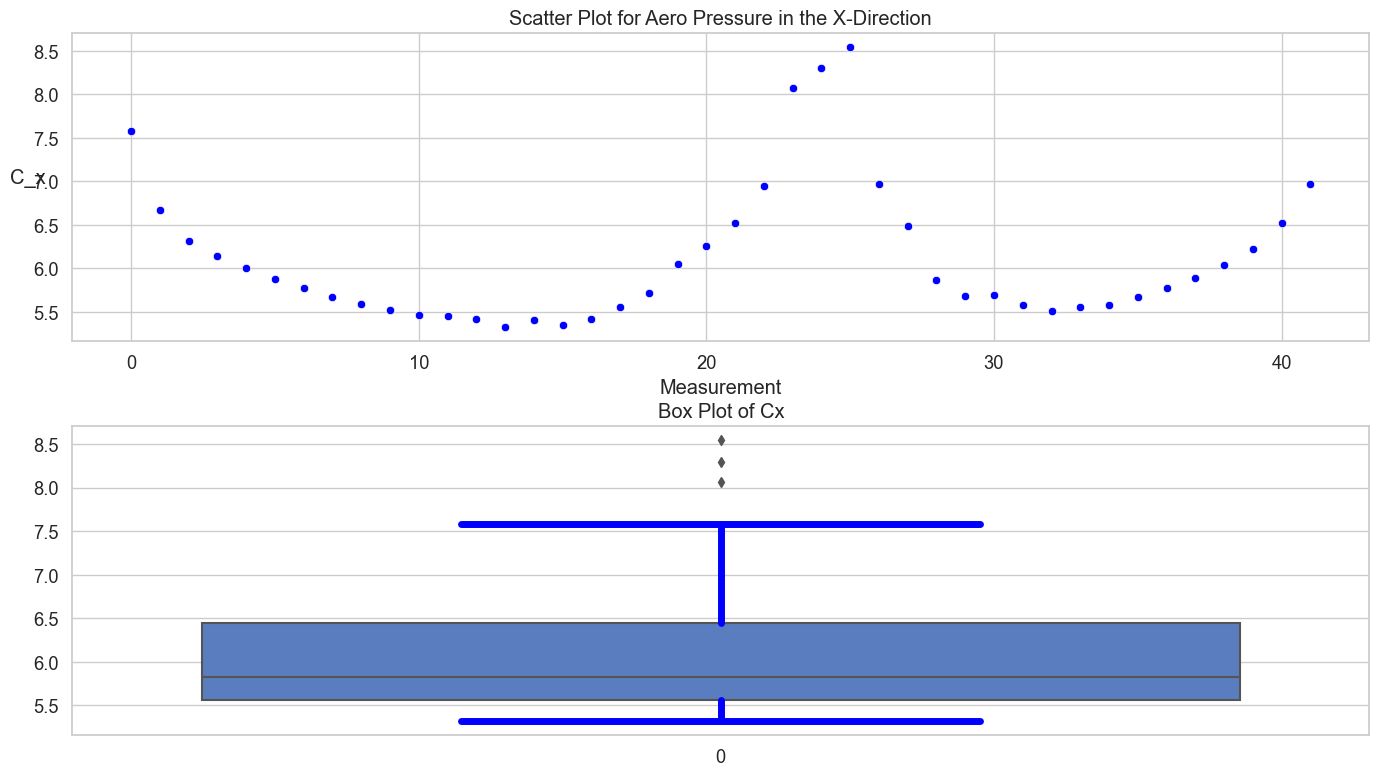

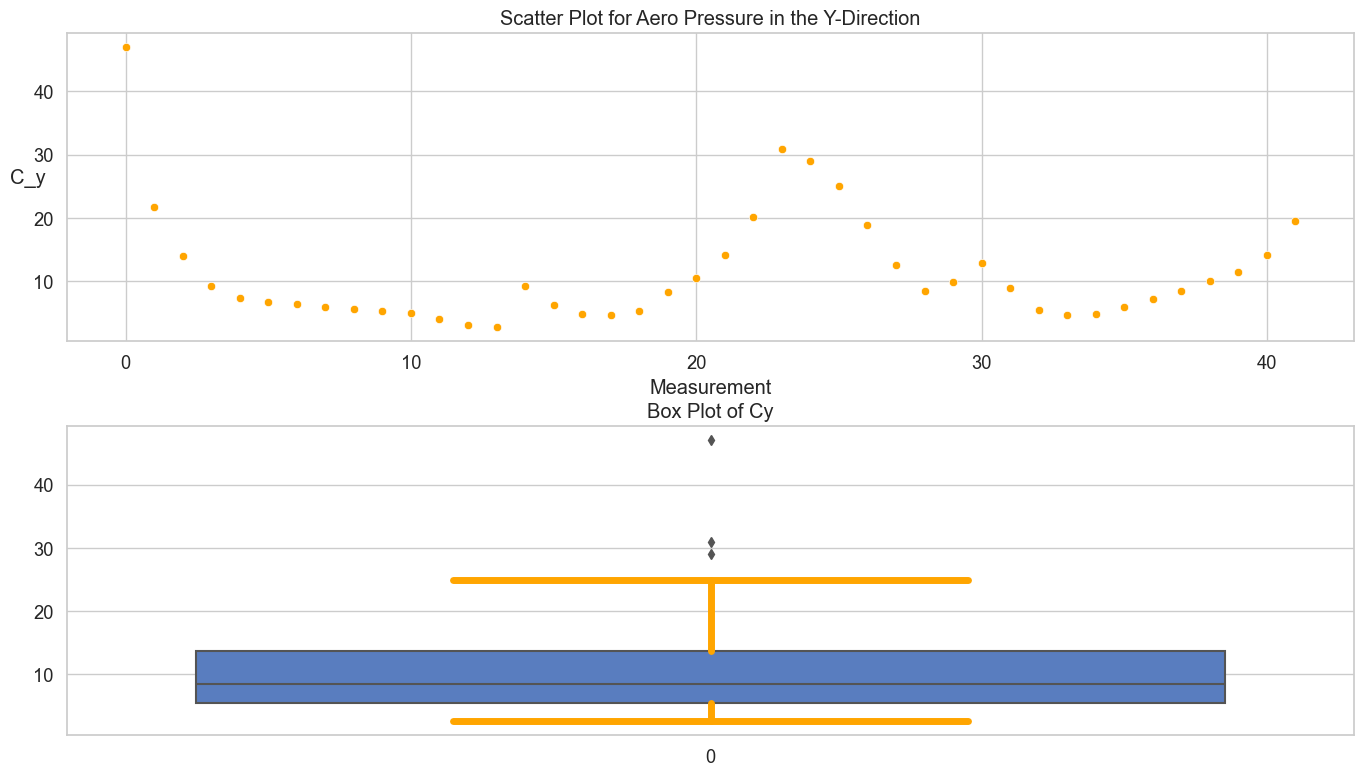

In [21]:
InvestigateScatterAndBox(outlier2_removed_df['cx'],0,'blue')
InvestigateScatterAndBox(outlier2_removed_df['cy'],1,'orange')

It can be seen here that Cx and Cy both follow a different range of values, adding that fact to the fact that the measurement read the same exact *extreme* value of **999.999** hints at the possibility of these recording also being mismeasurement, perhaps a calibration overflow, wiring issue, defect, etc.


We will then proceed to **remove** that reading.

#### Summarising data statistics without the extreme outliers

In [22]:
outlier2_removed_df.describe()

t         H1         H2         cx         cy         p0  \
count  42.000000  42.000000  42.000000  42.000000  42.000000  42.000000   
mean   45.377460   0.104548   0.178262   6.119339  11.286610 -21.932404   
std    26.850259   0.061171   0.071609   0.806528   8.923562   3.666915   
min     0.000000   0.010000   0.010000   5.323158   2.656922 -29.713543   
25%    22.986667   0.048000   0.126350   5.566454   5.492074 -24.561566   
50%    46.116667   0.105000   0.174700   5.821165   8.475000 -21.071825   
75%    67.786667   0.143000   0.233450   6.444990  13.748804 -18.868297   
max    89.640000   0.200000   0.344000   8.548003  47.078819 -17.444841   

              p1         p2         p3         p4  ...       p102       p103  \
count  42.000000  42.000000  42.000000  42.000000  ...  42.000000  42.000000   
mean  -22.154941 -22.384969 -22.626566 -22.878493  ... -24.368113 -23.940198   
std     3.715303   3.762181   3.810760   3.859345  ...   6.256803   5.732201   
min   -30.070845 -30.337730 -30.620487 -30.919304  ... -41.617897 -39.743275   
25%   -24.833163 -25.114542 -25.408328 -25.713056  ... -27.984277 -27.283575   
50%   -21.302381 -21.533135 -21.774301 -22.023657  ... -24.392313 -23.925756   
75%   -19.053310 -19.245940 -19.438788 -19.636509  ... -21.272060 -20.780808   
max   -17.574516 -17.724080 -17.884846 -18.055370  ...  -0.499053  -3.615058   

            p104       p105       p106       p107       p108       p109  \
count  42.000000  42.000000  42.000000  42.000000  42.000000  42.000000   
mean  -23.578828 -23.272966 -23.001602 -22.763004 -22.549257 -22.360125   
std     5.271611   4.875709   4.537982   4.276120   4.082754   3.966810   
min   -38.184025 -36.904694 -35.780308 -34.973980 -34.271980 -33.728584   
25%   -26.616893 -26.006425 -25.495385 -25.009947 -24.563608 -24.392420   
50%   -23.361347 -22.795325 -22.207905 -21.721319 -21.366493 -21.172235   
75%   -20.381514 -20.046937 -19.782105 -19.550041 -19.303101 -19.435194   
max    -6.728691  -9.840231 -12.945290 -16.044070 -17.041042 -17.311602   

            p110       p111  
count  42.000000  42.000000  
mean  -22.187768 -22.033106  
std     3.932267   3.971777  
min   -33.329220 -33.067398  
25%   -24.270800 -24.077929  
50%   -20.918478 -20.691067  
75%   -19.314863 -19.143260  
max   -17.454647 -17.373947  

[8 rows x 117 columns]

In [23]:
print(outlier2_removed_df[['cx','cy']].corr())
print("This obviously makes sense that the two readings are strongly correlated")

          cx        cy
cx  1.000000  0.879679
cy  0.879679  1.000000
This obviously makes sense that the two readings are strongly correlated


In [24]:
df = outlier2_removed_df

### Investigating H1 and H2:

#### Double checking the constraints are satisfied:

In [25]:
# Constraints for H1
min_H1 = 0.01
max_H1 = 0.2

# Constraints for H2
min_H2 = outlier2_removed_df['H1'].round(5)
max_H2 = (outlier2_removed_df['H1'] + 0.144).round(5)


In [26]:
outlier2_removed_df[['H1','H2']].corr()

H1        H2
H1  1.000000  0.781286
H2  0.781286  1.000000

In [27]:
constraints_satisfied_H1 = (outlier2_removed_df['H1'].round(5) >= min_H1) & (outlier2_removed_df['H1'].round(5) <= max_H1)
constraints_satisfied_H2 = (outlier2_removed_df['H2'].round(5) >= min_H2) & (outlier2_removed_df['H2'].round(5) <= max_H2)

print("Constraints satisfied for H1:")
print(constraints_satisfied_H1.all())

print("\nConstraints satisfied for H2:")
print(constraints_satisfied_H2.all())

Constraints satisfied for H1:
True

Constraints satisfied for H2:
True


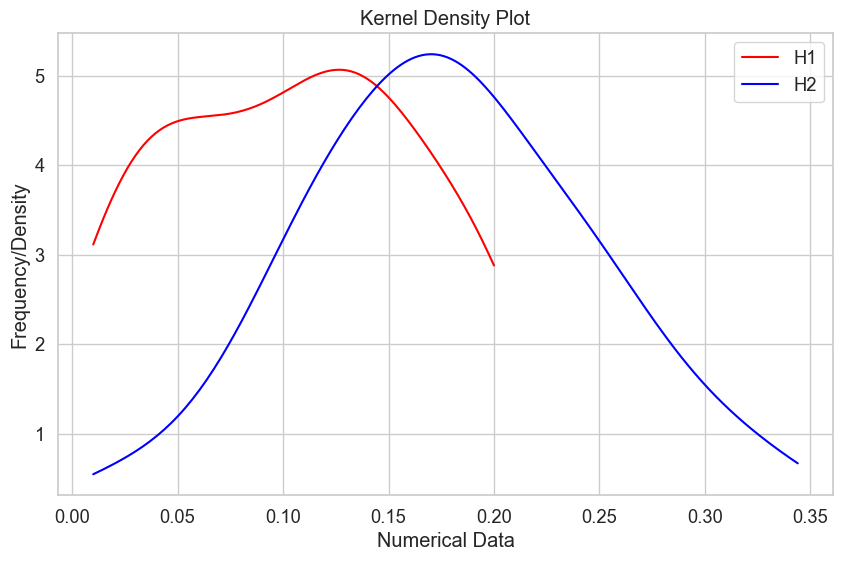

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a kernel density plot for H1 and H2
sns.kdeplot(outlier2_removed_df['H1'], color='red', ax=ax, label='H1', clip=(0.01, 0.2))
sns.kdeplot(outlier2_removed_df['H2'], color='blue', ax=ax, label='H2', clip=(0.01, 0.344))

ax.set_xlabel('Numerical Data')
ax.set_ylabel('Frequency/Density')
ax.set_title('Kernel Density Plot')
ax.legend()

plt.show()

### Transforming $C_x$ and $C_y$ into $C_{\text{total}}$, the target variable:


In [29]:
outlier2_removed_df['c_t'] = np.round(np.sqrt( (outlier2_removed_df['cx'])**2 + (outlier2_removed_df['cy']**2)),5)

In [30]:
outlier2_removed_df[['H1', 'H2','cx','cy' ,'c_t']].head()

H1      H2        cx         cy       c_t
0  0.010  0.0100  7.582424  47.078819  47.68552
1  0.029  0.0434  6.674054  21.731815  22.73356
2  0.048  0.0768  6.314854  14.022467  15.37878
3  0.067  0.1102  6.144211   9.135772  11.00971
4  0.086  0.1436  6.006707   7.317819   9.46737

**Notes:**
- It is important to study the **precision/sensitivity** of the strain gauge balance's measurements, as this could determine the suitable amount of **decimal** places to be included when modelling.
- It also can be noticed that H1 is up to **three** decimal places while H2 is up to **four** decimal places. While it is generally considered good practice to ensure consistency in the precision of similar measurements, given the context of the task, and that these two input variables are deliberately adjusted, I will leave H2 as it is to ensure accurate precision in the model.

# <center> Part 1

Using the wind tunnel data supplied, a surrogate model is to be constructed:

<center> $C_{\text{total}} = f(H_1, H_2)$

In [31]:
new_df = outlier2_removed_df[['H1', 'H2','c_t']]

In [32]:
H1 = new_df['H1']
H2 = new_df['H2']
c_t = new_df['c_t']

### Visualising the target variable with regards to H1 and H2:

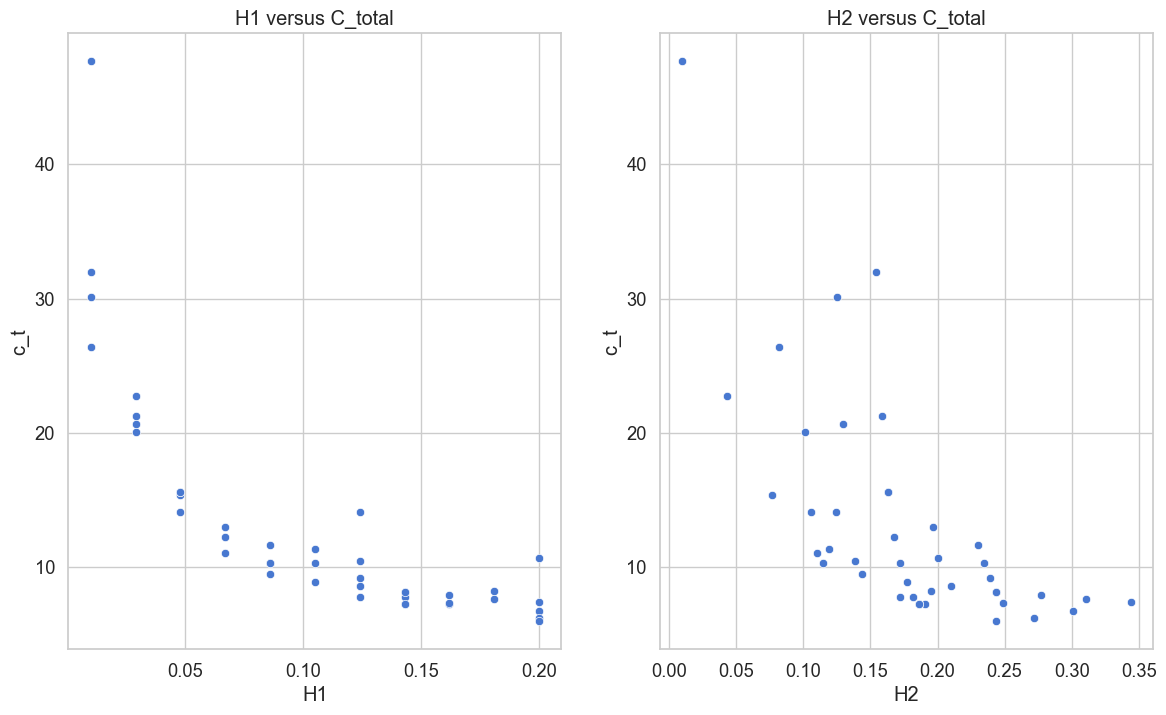

In [33]:
fig = plt.subplots(1, 2, figsize=(14, 8))

    
plt.subplot(121)
sns.scatterplot(x=H1, y=c_t)
plt.title("H1 versus C_total")

    
plt.subplot(122)
sns.scatterplot(x=H2, y=c_t)
plt.title("H2 versus C_total")

plt.show()

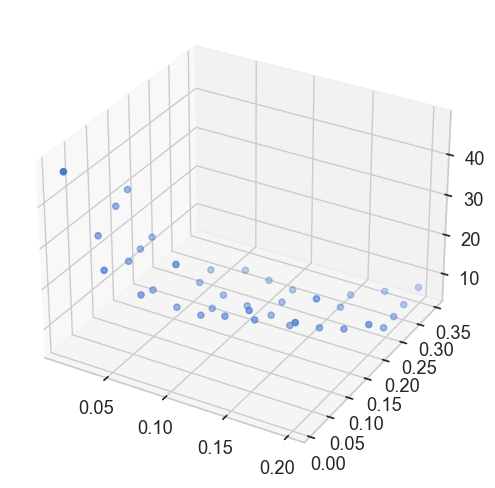

In [34]:
# Performing a preliminary 3-D scatterplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(H1, H2, c_t, label='Actual Data')

In [35]:
import plotly.graph_objects as go

# Performing an interactive 3-D scatterplot
fig = go.Figure(data=[go.Scatter3d(x=H1, y=H2, z=c_t, mode='markers',
                                   marker=dict(size=8, colorscale='viridis'))])

fig.update_layout(scene=dict(xaxis_title='H1',
                             yaxis_title='H2',
                             zaxis_title='c_total'))

fig.show()

## Modelling

Looking at the data and the context of this task, there are a couple of potentials models that could be contructed to model c_total. First, there are a couple of things to consider:
 - The dataset is small, containing **42** entries.
 - **Two** input features, with similar scales.
 

Here, the usage of some Regressional Models for the construction of the surrogate model are explored and compared:

1. **Linear Regression**
2. **Polynomial Regression**

The reasoning behind this is:
- **Simple:** Linear and polynomial regression are relatively simple models, making them suitable for small datasets with small number of features (in our case, to). Simplicity can be an advantage when dealing with limited data because it helps avoid overfitting.
- **Interpretable:** Models' coefficients/parameters are interpretable with regards to H1 and H2.
- **Visualisation:** since there are two input features, The use of 3-D surface plots for both linear and polynomial regression allows for easy visualization of the model's predictions.

**Note:** The high correlation (**0.78**) between H1 and H2 indicates **multicollinearity**. This can make it challenging to  interpret the coefficients of the linear or polynomial model. as the coefficients may become sensitive to small changes in the data.

In [36]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [37]:
# Errors for the models
models_training_error = {}
models_valid_error ={}

models_training_error_wout_delta = {}
models_valid_error_wout_delta ={}

#### Defining the Surface Plots for later Evaluation

In [38]:
# Making the Meshgrid space for the 3D-Plots
H1_range = np.linspace(new_df['H1'].min(), new_df['H1'].max(), 100)
H2_range = np.linspace(new_df['H1'].min(), new_df['H1'].max() + 0.144, 100)
H1_range, H2_range = np.meshgrid(H1_range, H2_range)
DELTA_range = np.abs(H1_range - H2_range)

In [39]:
# Creating a function that constructs a prediction space for each model
def CreateSurfacePlot(data, model, features, degree=None):
    fig = go.Figure()

    # Scatter plot for actual values
    fig.add_trace(go.Scatter3d(x=data['H1'], y=data['H2'], z=data['c_t'], mode='markers', name='Actual Values'))

    if degree is None:
        surface_preds = model.predict(features)
    else:
        #surface_preds = model.predict(features.transform(np.c_[H1_range.ravel(), H2_range.ravel(),DELTA_range.ravel()]))
        surface_preds = model.predict(features.transform(np.c_[H1_range.ravel(), H2_range.ravel()]))


    surface_preds = surface_preds.reshape(H1_range.shape)

    # Create a mask based on constraints
    mask = (H2_range >= H1_range) & (H2_range <= (H1_range + 0.144))

    # Check if any valid points exist
    if np.any(mask):
        # Apply the mask to the surfaceplot
        masked_poly_values = np.where(mask, surface_preds, np.nan)

        # Plot the masked surface
        name = 'Linear Regression Plane' if degree is None else f'{degree} Poly'
        fig.add_trace(go.Surface(z=masked_poly_values, x=H1_range[0], y=H2_range[:, 0], opacity=0.5, name=name, colorscale='icefire'))

    plot_title = '(Baseline) Linear Regression Fit' if degree is None else f'{degree} Polynomial Fit'
    fig.update_layout(scene=dict(xaxis_title='H1', yaxis_title='H2', zaxis_title='c_total'),
                      title=plot_title)

    fig.show()

#### Feature Engineering:

Taking the task into context, it can be hypothesised that H1 and H2 could hold a relationship between them that might affect the overall pressure of the vehicle. A hypothesised new feature "Delta" is constructed based on the difference in length between H2 and H1. The reasoning behind that is that aerodynamic pressure on the vehicle does not just depend on H1 and H2, but also on the difference between them, which resembles the "shape" of the car. Thus, believed to force the air to behave differently upon.

In [40]:
new_df = new_df.copy()
new_df['delta'] = abs(new_df['H2'] - new_df['H1'])

**However**, due to some problems that arose later with regards to optimization in Part 2, The "delta" feature will not be included in modelling.

#### Validation:

For validating the hypothesised models as accurately as possible, the Leave-One-Out-Cross-Validation (**LOOCV**) is suggested: Training on all data points except **one**, evaluating the trained model on that one data point, repeating these steps for each data point in the whole dataset, resulting in **N**-folds where N is the total number of data points.

Reason:

Given that the dataset is small with 42 data points, LOOCV can be a reasonable choice. It has the advantage of using all available data for **both** training and testing without **leakage**. While it can be computationally expensive, it is computationally feasible in this case given that hypothesised models are **simple**. Thus, providing a robust estimate of the generalization power of the model.

Now, potential polynomial regression models are fitted adding more complexity, along with a slight baseline Linear Model. With all models visualised as a surface plane on a 3-D Plot with the data.

#### Modelling

In [41]:
# Convert DataFrames to NumPy arrays
#X_np_ = new_df[['H1','H2', 'delta']].values

X_np_ = new_df[['H1','H2']].values  

y_np = new_df['c_t'].values

#np.random.seed(42)

In [42]:
def fit_and_evaluate(model, X_train, y_train, X_valid, y_valid):
    # Fit the model
    model.fit(X_train, y_train)

    # Evaluate on the training set and calculate MSE and percentage error
    y_pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    percentage_error_train = np.abs((y_train - y_pred_train) / y_train) * 100
    
    # Evaluate on the valid set and calculate MSE and percentage error
    y_pred_valid = model.predict(X_valid)
    mse_valid = mean_squared_error(y_valid, y_pred_valid)
    percentage_error_valid = np.abs((y_valid - y_pred_valid) / y_valid) * 100
    
    return percentage_error_train, percentage_error_valid, mse_train, mse_valid

In [43]:
def PerformModelling(X_np, poly_model):

        # Lists to store Results
    linear_mse_train_list = []
    linear_mse_valid_list = []
    linear_percentage_err_train_list = []
    linear_percentage_err_valid_list = []

    # Degrees for polynomial regression
    poly_degrees = [2,3,4,5,6]

    poly_mse_train_per_model = {degree: [] for degree in poly_degrees}
    poly_mse_valid_per_model = {degree: [] for degree in poly_degrees}
    poly_percentage_train_per_model = {degree: [] for degree in poly_degrees}
    poly_percentage_valid_per_model = {degree: [] for degree in poly_degrees}

    
    training_results = {}
    validation_results = {}
    
    
    
    
    # Linear regression
    
    
    linear_model = LinearRegression()
    
    # Create a leave-one-out cross-validator
    loo = LeaveOneOut()
    
    for train_index, valid_index in loo.split(X_np):
        X_train, X_valid = X_np[train_index], X_np[valid_index]
        y_train, y_valid = y_np[train_index], y_np[valid_index]
        

        percentage_err_train, percentage_err_valid, mse_linear_train, mse_linear_valid = fit_and_evaluate(linear_model,
                                                                                                          X_train,y_train,
                                                                                                          X_valid, y_valid)
        linear_mse_train_list.append(mse_linear_train)
        linear_mse_valid_list.append(mse_linear_valid)

        linear_percentage_err_train_list.append(percentage_err_train)
        linear_percentage_err_valid_list.append(percentage_err_valid)


    # Plot the linear regression surface
    #CreateSurfacePlot(new_df,linear_model,np.c_[H1_range.ravel(), H2_range.ravel(),DELTA_range.ravel()])
    CreateSurfacePlot(new_df,linear_model,np.c_[H1_range.ravel(), H2_range.ravel()])
    
    # Calculate overall average MSE and PE
    avg_linear_mse_train = np.mean(linear_mse_train_list)
    avg_linear_mse_valid = np.mean(linear_mse_valid_list)

    avg_linear_percentage_err_train = np.mean(linear_percentage_err_train_list)
    avg_linear_percentage_err_valid = np.mean(linear_percentage_err_valid_list)

    # Print overall average MSE for LR
    print("Linear Regression - Overall Average Mean Squared Error on Training Set:", avg_linear_mse_train)
    print("Linear Regression - Overall Average Mean Squared Error on valid Set:", avg_linear_mse_valid)


    training_results['Linear Regression'] = {'MSE':avg_linear_mse_train, 'Percentage Error': avg_linear_percentage_err_train}
    validation_results['Linear Regression'] = {'MSE':avg_linear_mse_valid, 'Percentage Error': avg_linear_percentage_err_valid}

    
    # Polynomial Fits

    # Fit and plot polynomial regression surfaces for different degrees
    for i,poly_degree in enumerate(poly_degrees):
        poly_features = PolynomialFeatures(degree=poly_degree)

        for train_index, valid_index in loo.split(X_np):
            X_train, X_valid = X_np[train_index], X_np[valid_index]
            y_train, y_valid = y_np[train_index], y_np[valid_index]

            # Fit the polynomial regression model
            X_train_poly = poly_features.fit_transform(X_train)
            X_valid_poly = poly_features.transform(X_valid)

            #poly_model = LinearRegression()

            poly_percentage_err_train, poly_percentage_err_valid, poly_mse_train , poly_mse_valid = fit_and_evaluate(poly_model,
                                                                                                                     X_train_poly,
                                                                                                                     y_train,
                                                                                                                     X_valid_poly,
                                                                                                                     y_valid)
            poly_mse_train_per_model[poly_degree].append(poly_mse_train)
            poly_mse_valid_per_model[poly_degree].append(poly_mse_valid)

            poly_percentage_train_per_model[poly_degree].append(poly_percentage_err_train)
            poly_percentage_valid_per_model[poly_degree].append(poly_percentage_err_valid)

        CreateSurfacePlot(new_df,poly_model,poly_features,degree=poly_degree)


        avg_poly_mse_train_per_model = np.mean(poly_mse_train_per_model[poly_degree])
        avg_poly_mse_valid_per_model = np.mean(poly_mse_valid_per_model[poly_degree])

        avg_poly_percentage_train_per_model = np.mean(poly_percentage_train_per_model[poly_degree])
        avg_poly_percentage_valid_per_model = np.mean(poly_percentage_valid_per_model[poly_degree])

        print(f"Polynomial Regression (Degree {poly_degree}) - Overall Average Mean Squared Error on Training Set:", avg_poly_mse_train_per_model)
        print(f"Polynomial Regression (Degree {poly_degree}) - Overall Average Mean Squared Error on valid Set:", avg_poly_mse_valid_per_model)
        
        # Number of parameters in the model
        print('Number of Parameters: ',poly_features.n_output_features_)

        training_results[f'{poly_degree} Polynomial'] = {'MSE':avg_poly_mse_train_per_model,
                                                              'Percentage Error': avg_poly_percentage_train_per_model}

        validation_results[f'{poly_degree} Polynomial'] = {'MSE':avg_poly_mse_valid_per_model, 
                                                           'Percentage Error': avg_poly_percentage_valid_per_model}

    return training_results, validation_results


In [44]:
models_training_error, models_valid_error = PerformModelling(X_np_, LinearRegression())

Linear Regression - Overall Average Mean Squared Error on Training Set: 27.014455013914265
Linear Regression - Overall Average Mean Squared Error on valid Set: 35.27365380200568


Polynomial Regression (Degree 2) - Overall Average Mean Squared Error on Training Set: 7.9113488695041845
Polynomial Regression (Degree 2) - Overall Average Mean Squared Error on valid Set: 18.084131324008787
Number of Parameters:  6


Polynomial Regression (Degree 3) - Overall Average Mean Squared Error on Training Set: 1.7136262706900942
Polynomial Regression (Degree 3) - Overall Average Mean Squared Error on valid Set: 8.736163205779226
Number of Parameters:  10


Polynomial Regression (Degree 4) - Overall Average Mean Squared Error on Training Set: 0.4430452112797386
Polynomial Regression (Degree 4) - Overall Average Mean Squared Error on valid Set: 6.110326737789383
Number of Parameters:  15


Polynomial Regression (Degree 5) - Overall Average Mean Squared Error on Training Set: 0.13339274725599842
Polynomial Regression (Degree 5) - Overall Average Mean Squared Error on valid Set: 6.819515436207301
Number of Parameters:  21


Polynomial Regression (Degree 6) - Overall Average Mean Squared Error on Training Set: 0.673305258979566
Polynomial Regression (Degree 6) - Overall Average Mean Squared Error on valid Set: 11.551929447755523
Number of Parameters:  28


### Constructing a Random Forest Regressor

A Random Forest Regressor is also implemented for comparison.

**Note:** Hyperparameter tuning was implemented

In [45]:
from sklearn.ensemble import RandomForestRegressor

loo = LeaveOneOut()
rf_mse_train_list = []
rf_mse_valid_list = []
rf_pe_train_list = []
rf_pe_valid_list = []


for train_index, valid_index in loo.split(X_np_):
    X_train, X_valid = X_np_[train_index], X_np_[valid_index]
    y_train, y_valid = y_np[train_index], y_np[valid_index]

    
    rf_model = RandomForestRegressor(n_estimators=40, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_train = rf_model.predict(X_train)
    y_pred = rf_model.predict(X_valid)
    
    train_pe = np.abs((y_train - y_pred_train) / y_train) * 100
    valid_pe = np.abs((y_valid - y_pred) / y_valid) * 100
    train_mse = mean_squared_error(y_train, y_pred_train)
    valid_mse = mean_squared_error(y_valid, y_pred)
    
    rf_mse_train_list.append(train_mse)
    rf_mse_valid_list.append(valid_mse)
    rf_pe_train_list.append(train_pe)
    rf_pe_valid_list.append(valid_pe)
    
rf_mse_train = np.mean(rf_mse_train_list)
rf_mse_valid = np.mean(rf_mse_valid_list)
rf_pe_train = np.mean(rf_pe_train_list)
rf_pe_valid = np.mean(rf_pe_valid_list)

models_training_error[f'Random Forest Regressor'] = {'MSE':rf_mse_train,
                                                              'Percentage Error': rf_pe_train}

models_valid_error[f'Random Forest Regressor'] = {'MSE':rf_mse_valid, 
                                                           'Percentage Error': rf_pe_valid}

### Comparing models

In [46]:
models = [model for model in models_training_error]
mse_train_errors = [error for error in [models_training_error[model]['MSE'] for model in models_training_error]]
percentage_train_errors = [error for error in [models_training_error[model]['Percentage Error'] for model in models_training_error]]

mse_valid_errors = [error for error in [models_valid_error[model]['MSE'] for model in models_valid_error]]
percentage_valid_errors = [error for error in [models_valid_error[model]['Percentage Error'] for model in models_valid_error]]



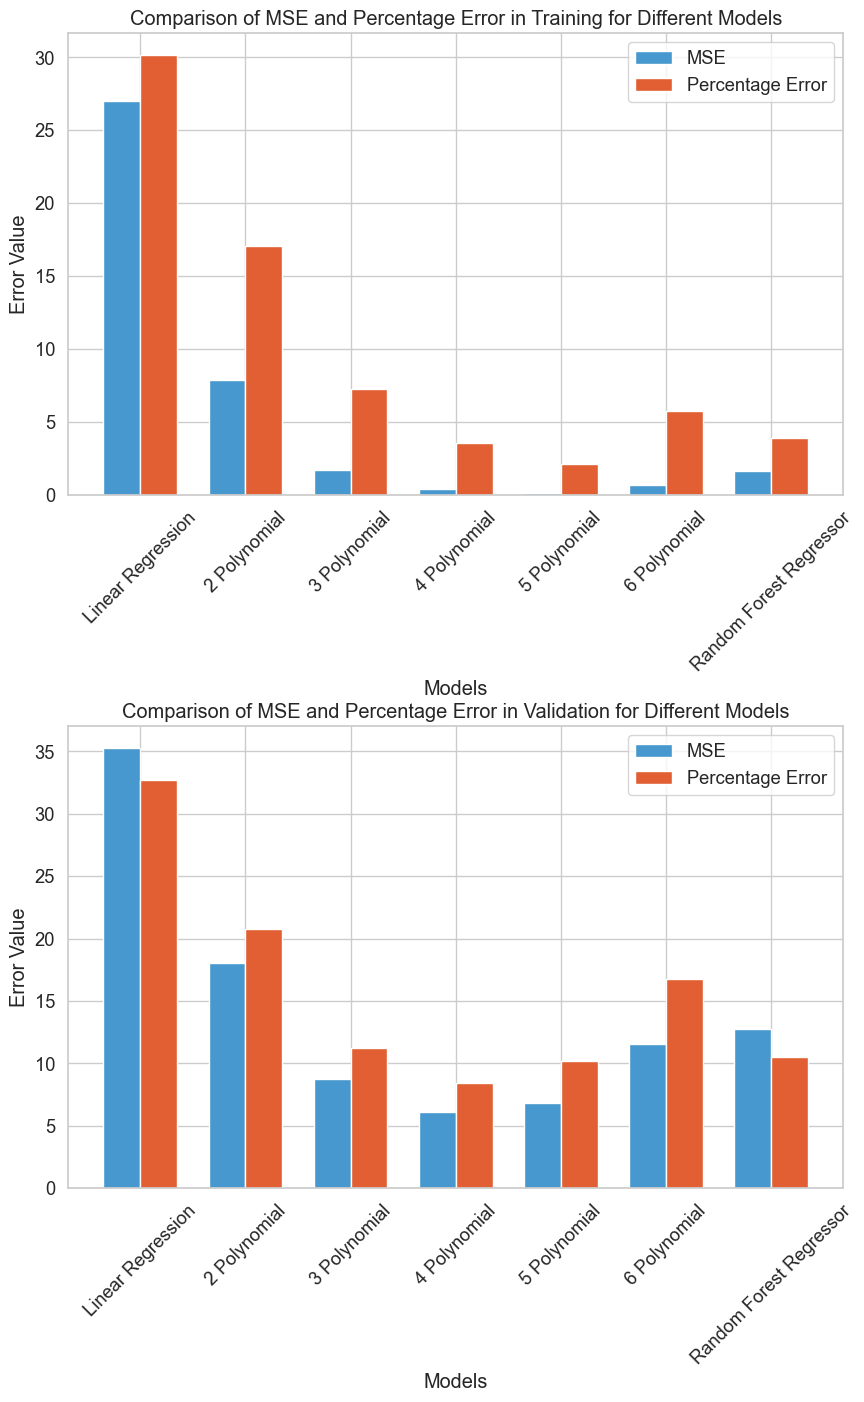

In [47]:
fig, axes= plt.subplots(2,1, figsize=(10, 15))

palette = sns.color_palette("icefire", 5)

# Define the width of the bars
bar_width = 0.35
index = np.arange(len(models))


plt.subplot(211)
axes[0].bar(index, mse_train_errors, bar_width, label='MSE', color = palette[0])
axes[0].bar(index + bar_width, percentage_train_errors, bar_width, label='Percentage Error', color=palette[4])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Error Value')
axes[0].set_title('Comparison of MSE and Percentage Error in Training for Different Models')
axes[0].set_xticks(index + bar_width / 2)
axes[0].set_xticklabels(models, rotation=45)
axes[0].legend()

plt.subplot(212)
axes[1].bar(index, mse_valid_errors, bar_width, label='MSE', color = palette[0])
axes[1].bar(index + bar_width, percentage_valid_errors, bar_width, label='Percentage Error', color=palette[4])
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Error Value')
axes[1].set_title('Comparison of MSE and Percentage Error in Validation for Different Models')
axes[1].set_xticks(index + bar_width / 2)
axes[1].set_xticklabels(models, rotation=45)
axes[1].legend()


plt.subplots_adjust(hspace=0.5)
plt.show()

In [48]:
models_valid_error['4 Polynomial']

{'MSE': 6.110326737789383, 'Percentage Error': 8.404053599359038}

It can be seen that a **4th Order Polynomial** model performs the best out of the potential models in the validation set (MSE: **6.11** Percentage Error: **8.40**).

While a Random Forest Regressor, a 5th, and a 6th Order Polynomial perform better than **4th Order Polynomial** in training, they perform worse during validation, which is a sign of **overfitting**.

Accordingly, a 4th Order Polynomial is chosen to be the surrogate model for $c_\text{total} = f(H_1,H_2)$ 

## P1 result

#### Fitting the "best" model on all the data

In [49]:
from sklearn.pipeline import make_pipeline
# Create the 4th order polynomial regression model
p1_best_model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Fit the model with all the data
p1_best_model.fit(X_np_, y_np)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [50]:
p1_df = pd.read_excel(file_path, sheet_name="P1")

In [51]:
X_test_p1 = p1_df[['H1', 'H2']].values

In [52]:
#new_df = pred_df.copy()
#new_df['delta'] = abs(pred_df['H2'] - pred_df['H1'])

In [53]:
#p1_df

#### Evaluating $c_\text{total}$ at the H1,H2 values in the P1 tab of "ML_test.xlsx"

In [54]:
c_total_predictions =  np.round(p1_best_model.predict(X_test_p1),5)

In [55]:
#c_total_predictions

In [56]:
# Performing an interactive 3-D scatterplot
fig = go.Figure(data=[go.Scatter3d(x=p1_df['H1'], y=p1_df['H2'], z=c_total_predictions, mode='markers',
                                   marker=dict(size=8, colorscale='icefire'),name='4th Polynomial Prediction')])

fig.update_layout(scene=dict(xaxis_title='H1',
                             yaxis_title='H2',
                             zaxis_title='c_total'),
                             title='4th Polynomial Prediction')

fig.show()

In [57]:
p1_df['ctotal'] = c_total_predictions

In [58]:
#p1_df

#### Populating $c_\text{total}$ in P1 sheet:

In [59]:
P1__ = p1_df.copy()

In [60]:
P1__

H1      H2    ctotal
0   0.01  0.0244  36.59195
1   0.01  0.0388  30.89267
2   0.01  0.0532  28.06734
3   0.01  0.0676  27.14115
4   0.01  0.0964  28.07589
..   ...     ...       ...
77  0.20  0.2288   6.34912
78  0.20  0.2576   6.19547
79  0.20  0.2864   6.41640
80  0.20  0.3152   6.24221
81  0.20  0.3296   6.63172

[82 rows x 3 columns]

In [61]:
#write_excel(file_path,'P1',P1__)

# <center> Part 2

Using the surrogate model chosen: **4th Order Polynomial**. It is asked to identify the optimal values for **H1** and **H2** That would result in the lowest $c_\text{total}$, whilst adhering to the constraints of the shape of H1 and H2.

This is an **optimization problem**. To solve it, a **numerical optimization** algorithm is to be used to find the values of H1 and H2 that minimize $c_\text{total}$.

For this problem, the **scipy.minimize** function is used. By specifing the objective function ($c_\text{total}$), the constraints for H1 and H2, an initial guess, and an optimization method, the algorithm can converge to the minimum of the objective function with respect to its parameters (H1,H2).

In [62]:
from scipy.optimize import minimize

#### Objective function

Since the goal here is to find the minimum $c_\text{total}$, the objective function to minimize would be the model-predicted $c_\text{total}$ 

In [63]:
def objective_function(x):
    ctotal_pred = p1_best_model.predict([[x[0], x[1]]])
    return ctotal_pred[0] 

#### Constraints

The constraints, as given in the task in the introduction, is as follows:
 1. **H1:**    
     - Lower Bound: $H1>=0.01$
     - Upper Bound: $H1<=0.20$
 2. **H2:**
     - Lower Bound: $H2>=H1$
     - Upper Bound: $H2<= H1+0.144$

In [64]:
# H1 Lower Bound constraint (H1 >= 0.01)
def H1_lower_bound(x):
    return x[0] - 0.01

# H1 Upper Bound constraint (H1 <= 0.2)
def H1_upper_bound(x):
    return 0.2 - x[0]

# H2 Lower Bound constraint (H2 >= H1)
def H2_lower_bound(x):
    return x[1] - x[0]

# H2 Upper Bound constraint (H2 <= H1+0.144)
def H2_upper_bound(x):
    return (x[0]+0.144) - x[1] 

# Constraints list
constraints = [
    {'type': 'ineq', 'fun': H1_lower_bound},
    {'type': 'ineq', 'fun': H1_upper_bound},
    {'type': 'ineq', 'fun': H2_lower_bound},
    {'type': 'ineq', 'fun': H2_upper_bound},
]

#### Initial Guess

It was noticed that most Random Initial Guesses result in the same convergence values.

In [65]:
# Initial guess
initial_guess = [0.02, 0.1]  #This can be adjusted based on domain knowledge

#### Identifying the optimal H1,H2 values

In [66]:
# Though computationally more expensive, we use the trust-constraint optimization method due to the constraints
result = minimize(objective_function, initial_guess, constraints=constraints, method ='trust-constr')

# Extract the optimized values
optimized_values = result.x
lowest_c_total = result.fun

# Print the result
print("Optimized Values for H1,H2:", optimized_values)
print("Lowest C_total:", lowest_c_total)

Optimized Values for H1,H2: [0.19577458 0.23832582]
Lowest C_total: 6.032958551526946


In [67]:
result

           message: `xtol` termination condition is satisfied.
           success: True
            status: 2
               fun: 6.032958551526946
                 x: [ 1.958e-01  2.383e-01]
               nit: 81
              nfev: 240
              njev: 80
              nhev: 0
          cg_niter: 121
      cg_stop_cond: 1
              grad: [-1.984e-04  6.104e-05]
   lagrangian_grad: [-2.444e-09  9.135e-08]
            constr: [array([ 1.858e-01]), array([ 4.225e-03]), array([ 4.255e-02]), array([ 1.014e-01])]
               jac: [array([[ 1.000e+00,  0.000e+00]]), array([[-1.000e+00,  0.000e+00]]), array([[-1.000e+00,  1.000e+00]]), array([[ 1.000e+00, -1.000e+00]])]
       constr_nfev: [240, 240, 240, 240]
       constr_njev: [0, 0, 0, 0]
       constr_nhev: [0, 0, 0, 0]
                 v: [array([ 5.978e-08]), array([-1.374e-04]), array([-5.185e-05]), array([ 9.093e-06])]
            method: tr_interior_point
        optimality: 9.135015527409077e-08
  constr_violation: 0.0


Using the dataset to generate initial guesses for the optimization algorithm and plotting the values

In [68]:
initial_guesses = X_np_
c1 = [h[0] for h in initial_guesses[:]] 
c2 = [h[1] for h in initial_guesses[:]] 

min_ct = []
for guess in initial_guesses:
    dummy = minimize(objective_function, guess, constraints=constraints, method ='trust-constr')
    min_ct.append(dummy.fun)
    
    

# Performing an interactive 3-D scatterplot
fig = go.Figure(data=[go.Scatter3d(x=c1, y=c2, z=min_ct, mode='markers',
                                   marker=dict(size=8, colorscale='viridis'))])

fig.update_layout(scene=dict(xaxis_title='H1',
                             yaxis_title='H2',
                             zaxis_title='Minimum C_total'))

fig.show()

It can be noticed that most of the initial guesses result in the same value, with an uncommon local minima that the algorithm can converge to.

#### Interpretation

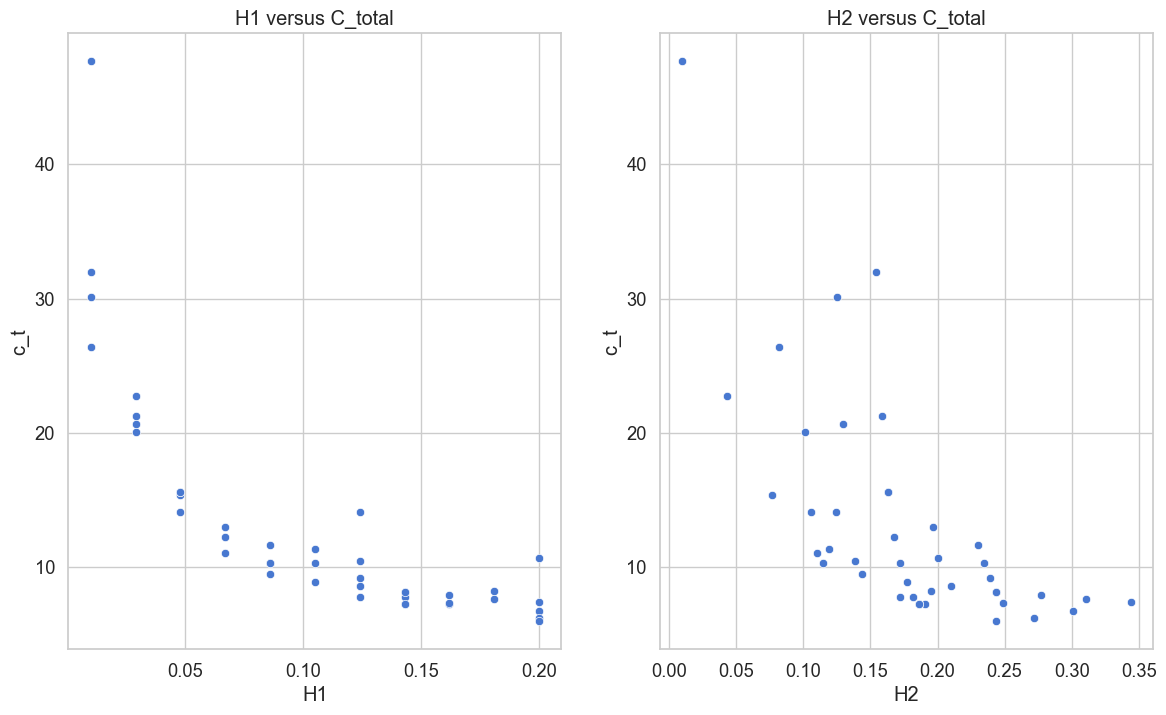

In [69]:
fig = plt.subplots(1, 2, figsize=(14, 8))

    
plt.subplot(121)
sns.scatterplot(x=H1, y=c_t)
plt.title("H1 versus C_total")

    
plt.subplot(122)
sns.scatterplot(x=H2, y=c_t)
plt.title("H2 versus C_total")

plt.show()

By inspecting both the (H1,H2) training data scatterplots carefully, it is sensible that the model would converge to a minimum at a really high H1 value (close to the **0.20** limit) and a value of H2 that lies between the **(0.20,0.25)** range.

#### Interpretation with regards to F1

Given that the target variable in this task is the overall pressure along both X (drag) and Y (downforce) directions as:
<center> $c_\text{total} = \sqrt{C_x^2 + C_y^2}$ </center>

By minimizing the **overall** presssure, one could assume that the goal in this task is optimizing the vehicle's performance for a race with a strong emphasis on **long straight sections**, where top speed is crucial. Whereas, in a race with alot of corners, one might have to set a minimum (sort of constraint) on the downforce ($C_y$) where it is important to maintain grip.

## P2 result

#### Populating row 2 in P2 sheet:

In [70]:
P2__ = pd.DataFrame({'H1': [optimized_values[0]],
                           'H2': [optimized_values[1]],
                           'ctotal': [lowest_c_total]})

In [71]:
P2__

H1        H2    ctotal
0  0.195775  0.238326  6.032959

In [72]:
#write_excel(file_path,'P2',P2__)

# <center> <strong>Part 5</strong>


_Since Part 5 relates closely with P1 and P2, the _ for Q5 will be conducted here in case of usage of some variables/functions from P1 and P2._

The part is asking to try and **minimize** the wind tunnel test time of a given run whilst still attempting to cover the (H1,H2) space as well as possible. This requires balancing two conflicting objectives: **minimizing** time and **maximizing** coverage.

Since there is no explicit knowledge on the _best_ (H1,H2) distribution. The reference in this part is assumed to be the (H1,H2) space given in the training data in the excel sheet.

#### Visualising the reference (H1,H2) space:

In [73]:
H1_H2_df = df[['H1','H2']]

H1 = df['H1']
H2 = df['H2']

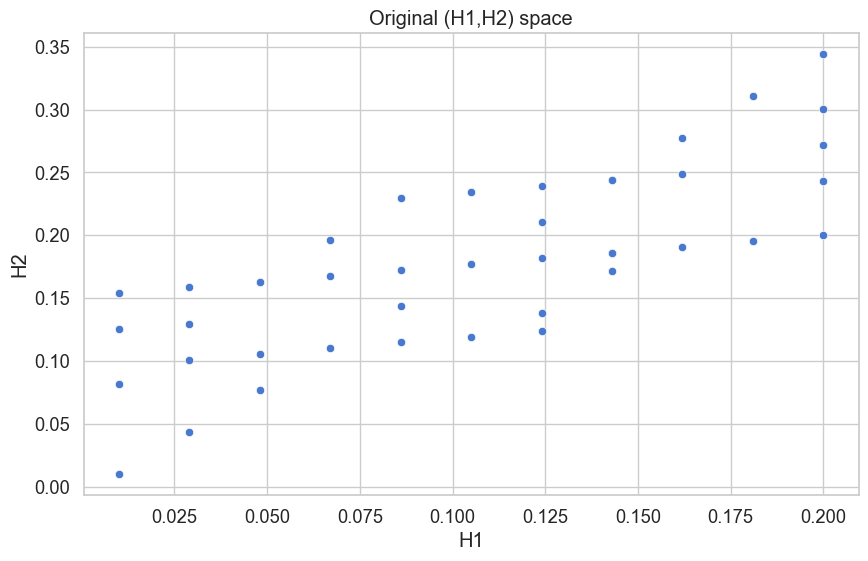

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot using Seaborn
sns.scatterplot(x=H1, y=H2)

# Set labels and title
plt.xlabel('H1')
plt.ylabel('H2')
plt.title('Original (H1,H2) space')

# Show the plot
plt.show()

## Generating the (H1,H2) Space

Given the part's description, the objective is to minimize wind tunnel time while covering the (H1, H2) space as effectively as possible. The task specifies identifying N discrete (H1, H2) points to visit during a wind tunnel run. Based on this, it is assumed that should generate a new set of N discrete points within the (H1, H2) space should be **generated**, rather than **sampling** a subset N points from an existing dataset.

It is important to note that there is **not** a **direct** **reliable** quantitiative way to measure how well would an N generated (H1,H2) points cover the space of (H1,H2) space. One approach is to calculate the percentage of original points that fall within the new range. However, one could naively say that having only two newly generated (H1,H2) with one of coordinates containing the lowest possible (H1,H2) values and the other containing the highest possible (H1,H2) values would still yield an coverage of 100% whilst not essentially covering the space _inside_ of that range.

_There is, however, one hypothesised way to quantitiatively measure the coverage, which, if reasonable, can help in finding the ideal compromise between accuracy and wind tunnel test time. I will touch upon later._

As for now, a visual inspection of both the original and the generated (H1,H2) values is conducted to superficially say that the generated (H1,H2) values are covering the space. 

#### Generating N discrete (H1,H2) points

Choosing the _ideal_ value of N, which represents the number of discrete (H1, H2) points to visit during a wind tunnel run, especially, when trying the **minimize** the wind tunnel test time with no quantitative reference but visual inspection is a combinatorial problem. The factors affecting the chosen value includes:

 - **Trade-off between Accuracy and Time:** The more points are generated, the finer resolution and accuracy in covering the (H1,H2) space, but also the _longer_ it takes to cover the space.


 - **Prior Knowledge:** Prior knowledge can be useful if certain regions are known to be more critical, and allocating more points in that region could not be as _time_ wasting as other regions.

A reasonably chosen N of **30** (H1,H2) points is chosen. That number is chosen as it is believed to hold an adequate compromise between decreasing the wind tunnel time and the coverage of the space, which will be showcased in the visualisations in the next section.

The 30 datapoints are uniformly generated by sampling from the range of H2 whilst creating an evenly separated H1 range. All whilst adhering the constraints. 


_Alternative ways could include: Grid Search, or Latin Hypercube Sampling: a space-filling sampling method_

In [75]:
N = 30

# Function to generate N discrete points
def generate(N):
    np.random.seed(42)
    
    min_H1 = 0.01
    max_H1 = 0.2

    H1_values = np.linspace(min_H1, max_H1, num=N)

    coordinates = []

    for H1 in H1_values:

        min_H2 = H1
        max_H2 = H1 + 0.144 # Adhering to the constraint
        H2 = np.random.uniform(min_H2, max_H2)  # Randomly sample within the range
        coordinates.append((np.round(H1,4), np.round(H2,4)))
    return coordinates

generated_discrete_points = generate(N)
generated_h1 = [x[0] for x in generated_discrete_points]
generated_h2 = [x[1] for x in generated_discrete_points]

generated_discrete_points_df = pd.DataFrame(generated_discrete_points, columns = [['H1', 'H2']])

Comparing summary statistics:

In [76]:
generated_discrete_points_df.describe(),outlier2_removed_df[['H1','H2']].describe()

(              H1         H2
 count  30.000000  30.000000
 mean    0.105000   0.168153
 std     0.057664   0.063812
 min     0.010000   0.057700
 25%     0.057525   0.128050
 50%     0.105000   0.173650
 75%     0.152475   0.208950
 max     0.200000   0.286900,
               H1         H2
 count  42.000000  42.000000
 mean    0.104548   0.178262
 std     0.061171   0.071609
 min     0.010000   0.010000
 25%     0.048000   0.126350
 50%     0.105000   0.174700
 75%     0.143000   0.233450
 max     0.200000   0.344000)

## Visual Inspection of the generated (H1,H2)

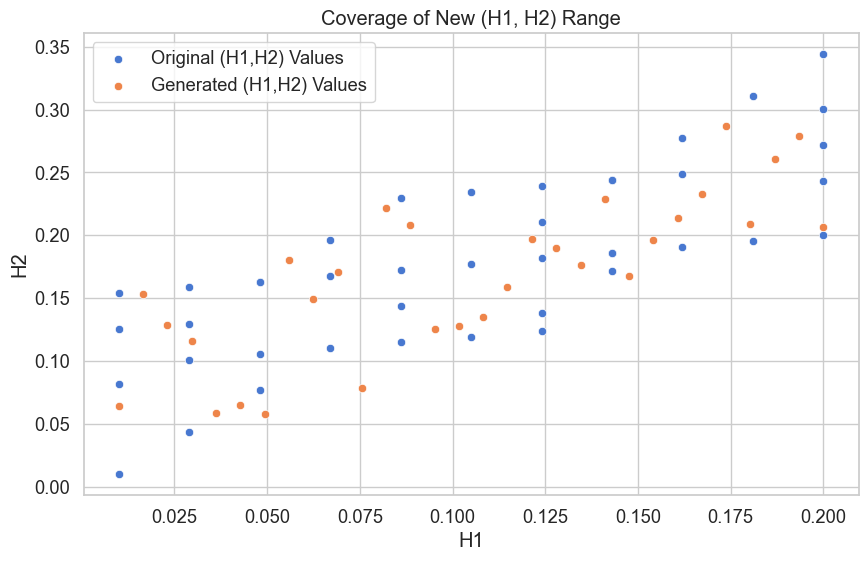

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=H1, y=H2, label='Original (H1,H2) Values')

sns.scatterplot(x=generated_h1, y=generated_h2, label='Generated (H1,H2) Values')

plt.xlabel('H1')
plt.ylabel('H2')
plt.title('Coverage of New (H1, H2) Range')
plt.legend()


plt.show()

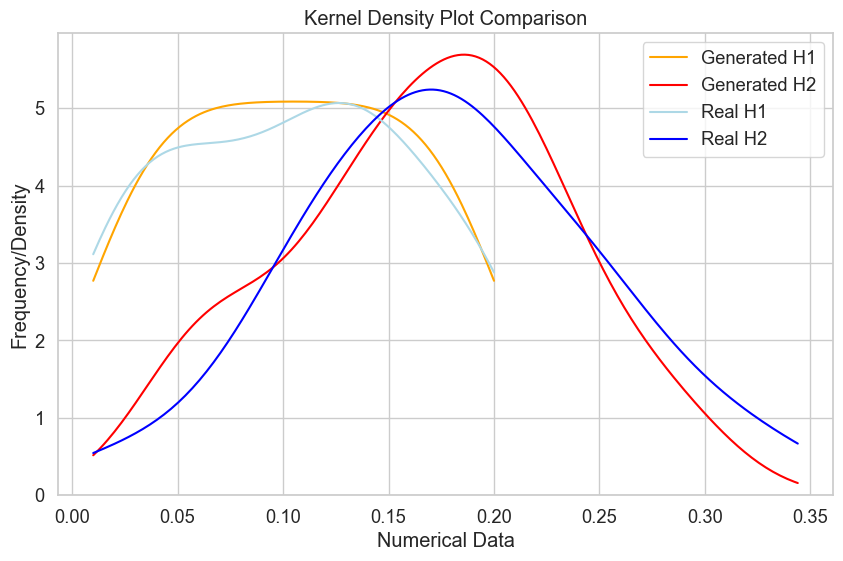

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))

# Subplot 1: Kernel Density Plot of the generated (H1,H2) values
sns.kdeplot(generated_h1, color='orange', label='Generated H1', clip=(0.01, 0.2))
sns.kdeplot(generated_h2, color='red',label='Generated H2', clip=(0.01, 0.344))
sns.kdeplot(outlier2_removed_df['H1'], color='lightblue', label='Real H1', clip=(0.01, 0.2))
sns.kdeplot(outlier2_removed_df['H2'], color='blue', label='Real H2', clip=(0.01, 0.344))
ax.set_xlabel('Numerical Data')
ax.set_ylabel('Frequency/Density')
ax.set_title('Kernel Density Plot Comparison')
ax.legend()

plt.show()

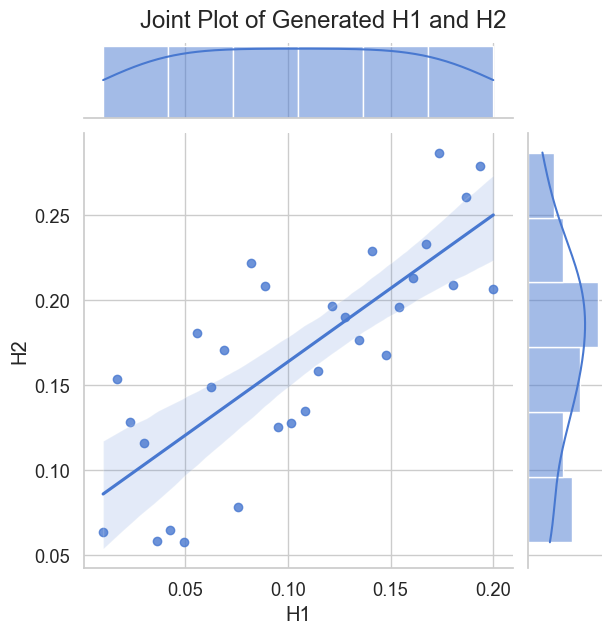

In [79]:
# Joint Plot of Generated (H1,H2)
sns.jointplot(x=generated_h1, y=generated_h2, kind='reg')
plt.xlabel('H1')
plt.ylabel('H2')
plt.suptitle('Joint Plot of Generated H1 and H2', y=1.02)
plt.show()

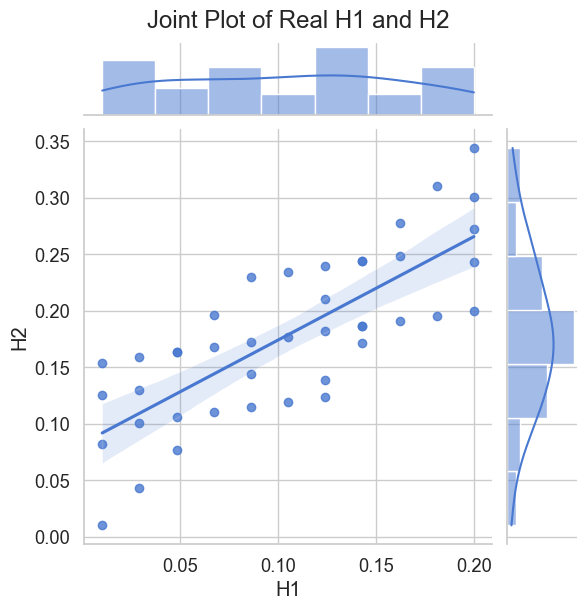

In [80]:
# Joint Plot of Real (H1,H2)
sns.jointplot(x='H1', y='H2', data=outlier2_removed_df, kind='reg')
plt.xlabel('H1')
plt.ylabel('H2')
plt.suptitle('Joint Plot of Real H1 and H2', y=1.02)
plt.show()


One proposed idea to visually inspect the (H1,H2) spaces is as follows:
 - Use H1 and H2 as an input feature and a target variable respectively.
 - Fit a Linear Regression Model (Real-Space Model) on the Real H1 space, with Real H2 as target variable.
 - Fit another Linear Regression Model (Generated-Space Model) on the Generated H1 Space, with Generated H2 as target variable.
 - Test the **Real-Space Model** on the **Generated** (H1,H2) points.
 - Test the **Generated-Space Model** on the **Real** (H1,H2) points.

In [81]:
def Evaluate_H1_H2_Space(Real_data_df,Generated_data_df):
    
    
    Real_H1_H2_X = Real_data_df['H1'].values.reshape(-1,1)
    Real_H1_H2_y = Real_data_df['H2'].values.reshape(-1,1)
    
    Generated_H1_H2_X = Generated_data_df['H1'].values.reshape(-1,1)
    Generated_H1_H2_y = Generated_data_df['H2'].values.reshape(-1,1)
    
    
    
    Real_H1_H2_model = LinearRegression()
    Real_H1_H2_model.fit(Real_H1_H2_X, Real_H1_H2_y)
    
    
    Real_H1_H2_model_train_preds = Real_H1_H2_model.predict(Real_H1_H2_X)
    Real_H1_H2_model_test_preds = Real_H1_H2_model.predict(Generated_H1_H2_X)
    
    
    
    Generated_H1_H2_model = LinearRegression()
    Generated_H1_H2_model.fit(Generated_H1_H2_X, Generated_H1_H2_y)
    
    Generated_H1_H2_model_train_preds = Generated_H1_H2_model.predict(Generated_H1_H2_X)
    Generated_H1_H2_model_test_preds = Generated_H1_H2_model.predict(Real_H1_H2_X)

    
    fig = plt.subplots(2,1,figsize=(10, 10))
    
    plt.subplot(211)
    plt.scatter(Real_H1_H2_X, y=Real_H1_H2_y, color='blue', label= 'Real Data')
    
    plt.plot(Real_H1_H2_X, Real_H1_H2_model_train_preds, color='red', label='Model TRAINED on this data')
    
    plt.plot(Real_H1_H2_X, Generated_H1_H2_model_test_preds, color='lightgreen', label='Model TESTED on this data')
    
    plt.xlabel('Real H1')
    plt.ylabel('Real H2')
    plt.title('Real (H1,H2) Space')
    plt.legend()
    
    
    
    plt.subplot(212)
    plt.scatter(Generated_H1_H2_X, Generated_H1_H2_y, color='blue', label='Generated Data')
    
    plt.plot(Generated_H1_H2_X, Generated_H1_H2_model_train_preds, color='red', label='Model TRAINED on this data')
    
    plt.plot(Generated_H1_H2_X, Real_H1_H2_model_test_preds, color='lightgreen', label='Model TESTED on this data')
    
    plt.xlabel('Generated H1')
    plt.ylabel('Generated H2')
    plt.title('Generated (H1,H2) Space')
    plt.legend()

    plt.show()
    
        
    return Real_H1_H2_model.coef_ , Generated_H1_H2_model.coef_

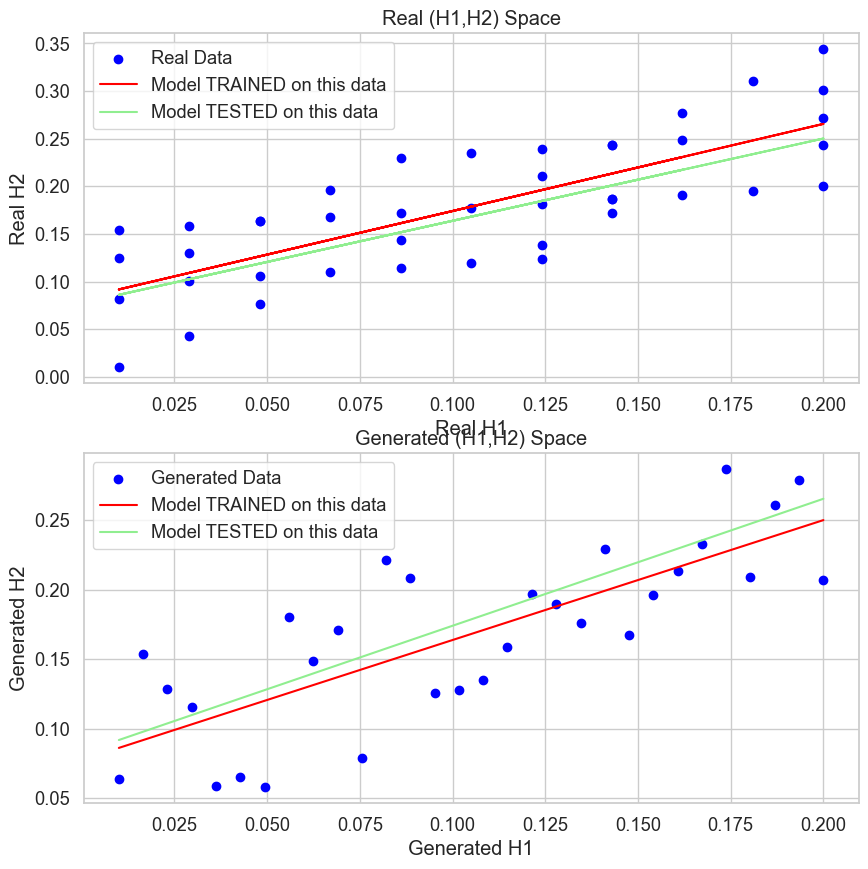

(array([[0.91460999]]), array([[0.86369292]]))

In [82]:
Evaluate_H1_H2_Space(Real_data_df = outlier2_removed_df[['H1','H2']], Generated_data_df = generated_discrete_points_df )

## Minimizing Wind Tunnel Time

Minimizing the wind tunnel time with a given (H1,H2) space is an optimization problem.

#### Defining a calculate_time function

Since the objective here is to minimize the total time for a given (H1,H2) run, a function that calculates the time taken for (H1,H2) to adjust to different values based on their speed is defined.

In [83]:
# Define the speeds for H1 and H2
H1_speed = 0.01  # m/s
H2_speed = 0.015  # m/s

In [84]:
# Function to calculate the time between two points based on H1 and H2 speeds
def calculate_time(point1, point2):
    H1_distance = abs(point2[0] - point1[0])
    H2_distance = abs(point2[1] - point1[1])
    return max(H1_distance / H1_speed, H2_distance / H2_speed)  # Wait for slower one to catch up, i.e. Limiting factor

In [85]:
# A function for calculating the total time in a sequence using the calculate time function
def objective_function(sequence, get_time_sequence=False):
    total_time = 0
    time_sequence = []
    time_sequence.append(total_time)
    for i in range(len(sequence) - 1):
        total_time += calculate_time(sequence[i], sequence[i+1])
        time_sequence.append(total_time)
    if (get_time_sequence):
        return time_sequence
    else:
        return total_time

### Proposed Optimization Algorithms

With regards to the nature of this optimization problem, it requires some exploring in the search space and trying different sequences. Thus, a few Optimization Algorithms that are applicable to this context are proposed:
 - **Naive/Baseline:** Provides a simple benchmark against which to compare with the rest algorithms.
 
 
 - **Random Search:** Offers a simple exploration of the space by randomly sampling points and evaluating them, can act as a more sophisticated benchmark
 
 
 - **Greedy:** Offers a straight forward approach by optimizing locally optimal choices at each step without taking into consideration the future steps. Effective when the objective function has properties that align with the greedy heuristic.
 
 
 - **Local Search:** Iteratively improves the solution (sequence in this case) by exploring the sequence's neighbours. Effective for finding locally optimal solutions.
 
 
 - **Simulated Annealing:** Offers an adjustable balance between _exploitation_ and _exploration_. Effective for escaping local minima.

These proposed algorithms are implemented to find the ideal result

In [86]:
results_per_algo = {}

#### Naive (Baseline)

In [87]:
def Naive(points, N, max_iterations=50):
    total_times = []
    visit_sequences = []
    
    # performing the algo N times starting in N different (H1,H2) spaces
    for _ in range(max_iterations):
        for i in range(N):
            remaining_points = points.copy()
            visited = [points[i]]
            remaining_points.pop(i)  # Remove the first point from the set of remaining points
            total_time = 0

            while remaining_points:
                # Randomly chooses the next point
                next_point = remaining_points[np.random.randint(0, len(remaining_points))]
                visited.append(next_point)
                remaining_points.remove(next_point)
                total_time += calculate_time(visited[-2], visited[-1])  # Update total time
            total_times.append(total_time)
            visit_sequences.append(visited)

    minimum_time_idx = np.argmin(total_times)

    return visit_sequences[minimum_time_idx], np.round(total_times[minimum_time_idx],5) 

In [88]:
naive_best_visited_points, naive_best_total_time = Naive(generated_discrete_points, N)
print("Total wind tunnel time:", naive_best_total_time, "seconds")


get_sequence = True

results_per_algo['Naive'] = {'Sequence' : naive_best_visited_points, 'Time' : naive_best_total_time,
                             'Time Sequence' : np.round(objective_function(naive_best_visited_points,
                                                                        get_time_sequence=get_sequence),5)}

Total wind tunnel time: 151.87 seconds


Since there is no optimization strategy in the Naive algorithm, better (faster) times are expected in the subsequent algorithms.

#### Greedy Algorithm

In [89]:
# Greedy algorithm to minimize wind tunnel time
def Greedy(points, N):
    total_times = []
    visit_sequences = []
    
    # performing the algo N times starting in N different (H1,H2) spaces
    for i in range(N):
        remaining_points = points.copy()
        visited = [points[i]]
        remaining_points.pop(i)  # Remove the first point from the set of remaining points
        total_time = 0

        while remaining_points:
            # Find the nearest remaining point, since dataset is small, we perform the simpler min() than doing an explicit loop
            nearest_point = min(remaining_points, key=lambda x: calculate_time(visited[-1], x))
            visited.append(nearest_point)
            remaining_points.remove(nearest_point)
            total_time += calculate_time(visited[-2], visited[-1])  # Update total time
        total_times.append(total_time)
        visit_sequences.append(visited)
    
    minimum_time_idx = np.argmin(total_times)
    
    return visit_sequences[minimum_time_idx], np.round(total_times[minimum_time_idx],5)


In [90]:
greedy_best_visited_points, greedy_best_total_time = Greedy(generated_discrete_points, N)
print("Total wind tunnel time:", greedy_best_total_time, "seconds")


get_sequence = True

results_per_algo['Greedy'] = {'Sequence' : greedy_best_visited_points, 'Time' : greedy_best_total_time, 
                              'Time Sequence' : np.round(objective_function(greedy_best_visited_points,
                                                                        get_time_sequence=get_sequence),5)}

Total wind tunnel time: 54.14333 seconds


#### Random Search

In [91]:
def generate_random_sequence():
    # Random sampling from the sequence with no replacement
    return random.sample(generated_discrete_points, len(generated_discrete_points))

def random_search(initial_sequence, max_iterations=500000):
    best_sequence = initial_sequence[:]
    best_time = objective_function(best_sequence)
    
    #Evaluating the randomised sample's time
    for _ in range(max_iterations):
        random_sequence = generate_random_sequence()
        random_time = objective_function(random_sequence)
        if random_time < best_time:          
            best_sequence = random_sequence
            best_time = random_time
    
    return best_sequence, np.round(best_time,5)

In [92]:
random_search_best_visited_points, random_search_best_total_time = random_search(generated_discrete_points)

print("Total wind tunnel time:", random_search_best_total_time, "seconds")



get_sequence = True

results_per_algo['Random Search'] = {'Sequence':random_search_best_visited_points, 
                                        'Time' : random_search_best_total_time,
                                        'Time Sequence' : np.round(objective_function(random_search_best_visited_points,
                                                                        get_time_sequence=get_sequence),5)}

Total wind tunnel time: 84.68333 seconds


#### Local Search 

In [93]:
def generate_neighbor(current_sequence):
    
    # Find a local neighbor sequence (an index swap)
    neighbor = current_sequence[:]
    #print(neighbor)
    index1, index2 = random.sample(range(len(neighbor)), 2)
    neighbor[index1], neighbor[index2] = neighbor[index2], neighbor[index1]
    #print(index1, index2)
    #print(neighbor)
    #print()
    return neighbor

def shift_right(lst):
    return [lst[-1]] + lst[:-1]

def LocalSearch(initial_sequence,N, max_iterations=500000):
    
    total_times = []
    visit_sequences = []

    current_sequence = initial_sequence[:]
    best_sequence = current_sequence[:]
    best_time = objective_function(best_sequence)
    
    # Evaluating the neighbor sequence's time
    for _ in range(max_iterations):
        neighbor_sequence = generate_neighbor(current_sequence)
        #print(neighbor_sequence)
        neighbor_time = objective_function(neighbor_sequence)
        if neighbor_time < best_time:
            best_sequence = neighbor_sequence
            best_time = neighbor_time
        current_sequence = neighbor_sequence

    return best_sequence, np.round(best_time,5) 


In [94]:
localsearch_best_visited_points, localsearch_best_total_time = LocalSearch(generated_discrete_points, N)
print("Total wind tunnel time:", localsearch_best_total_time, "seconds")


get_sequence = True

results_per_algo['Local Search'] = {'Sequence' : localsearch_best_visited_points, 'Time' : localsearch_best_total_time,
                                    'Time Sequence' : np.round(objective_function(localsearch_best_visited_points,
                                                                        get_time_sequence=get_sequence),5)}

Total wind tunnel time: 82.42667 seconds


#### Simulated Annealing

In [95]:
import math

def simulated_annealing(initial_sequence, initial_temperature, cooling_rate, max_iterations=500000):
    current_sequence = initial_sequence[:]
    best_sequence = current_sequence[:]
    best_time = objective_function(best_sequence)
    current_time = best_time
    temperature = initial_temperature
    
    for _ in range(max_iterations):
        # Find a local neighbour
        neighbor_sequence = generate_neighbor(current_sequence)
        neighbor_time = objective_function(neighbor_sequence)
        
        if temperature == 0:
            return best_sequence, np.round(best_time,5)
        
        # A Probabilistic choice based on the time and "temperature" that it can still choose the slower route for exploring
        
        if neighbor_time < current_time or random.random() < math.exp((current_time - neighbor_time) / temperature):
            current_sequence = neighbor_sequence
            current_time = neighbor_time
        if current_time < best_time:
            #print(current_time)
            best_sequence = current_sequence
            best_time = current_time
        temperature *= cooling_rate
    
    return best_sequence, np.round(best_time,5)

In [96]:
initial_temperature = 100  # Initial temperature
cooling_rate = 0.2  # Cooling rate

simulated_annealing_best_visited_points, simulated_annealing_best_total_time = simulated_annealing(generated_discrete_points,
                                                                                                   initial_temperature,
                                                                                                   cooling_rate)
print("Total wind tunnel time:", simulated_annealing_best_total_time, "seconds")



get_sequence = True

results_per_algo['Simulated Annealing'] = {'Sequence':simulated_annealing_best_visited_points, 
                                        'Time' : simulated_annealing_best_total_time,
                                        'Time Sequence' : np.round(objective_function(simulated_annealing_best_visited_points,
                                                                        get_time_sequence=get_sequence),5)}

Total wind tunnel time: 68.02667 seconds


## Comparing Algorithms

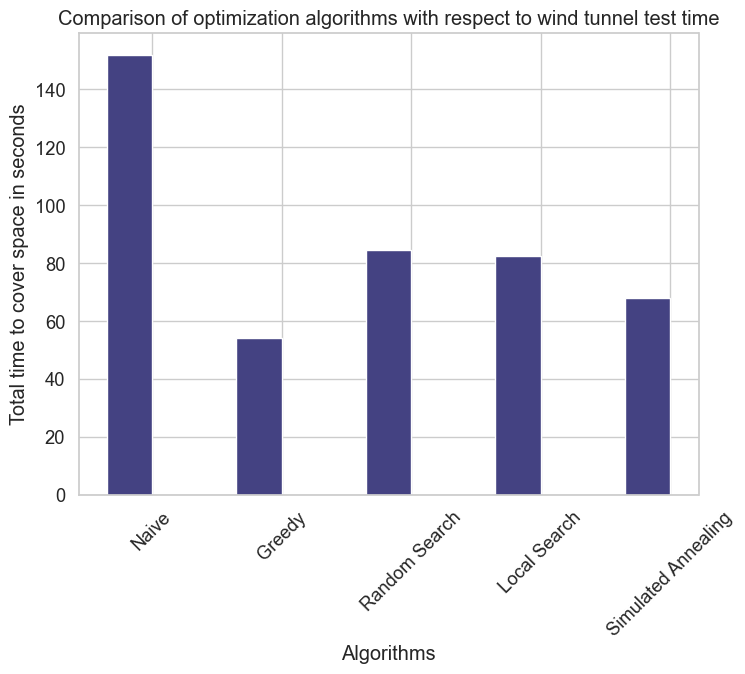

In [97]:
algo_names = [ name for name in results_per_algo.keys() ]
algo_times = [ algo['Time'] for algo in results_per_algo.values() ]

fig, axes = plt.subplots(figsize=(8, 6))

palette = sns.color_palette("icefire", 20)

# Define the width of the bars
bar_width = 0.35
index = np.arange(len(algo_names))

axes.bar(algo_names, algo_times, bar_width, label='Total Time', color=palette[6])
axes.set_xlabel('Algorithms')
axes.set_ylabel('Total time to cover space in seconds')
axes.set_title('Comparison of optimization algorithms with respect to wind tunnel test time')
axes.set_xticks(index + bar_width / 2)
axes.set_xticklabels(algo_names, rotation=45)

plt.show()

Visualising the Path:

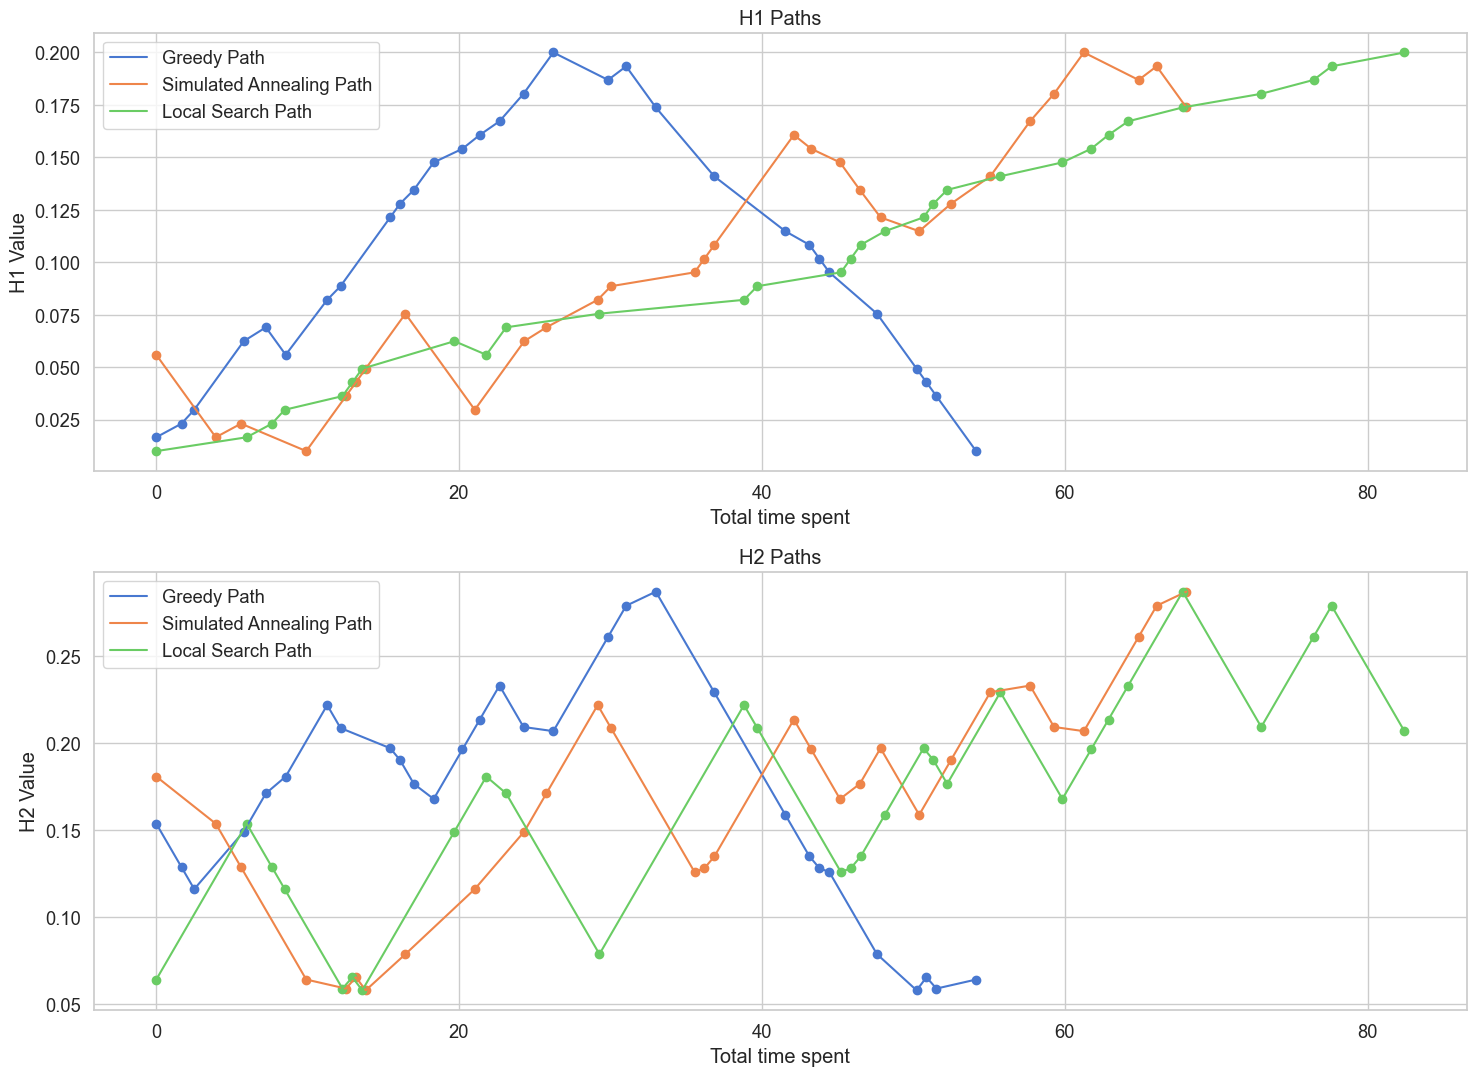

In [98]:
plt.subplots(2,1, figsize=(15, 11))

for i in range(2):
    SA_T = [t for t in results_per_algo['Simulated Annealing']['Time Sequence']]
    SA_H = [h[i] for h in results_per_algo['Simulated Annealing']['Sequence']]

    G_T = [t for t in results_per_algo['Greedy']['Time Sequence']]
    G_H = [h[i] for h in results_per_algo['Greedy']['Sequence']]

    LS_T = [t for t in results_per_algo['Local Search']['Time Sequence']]
    LS_H = [h[i] for h in results_per_algo['Local Search']['Sequence']]

    plt.subplot(2,1,i+1)
    # Plotting the paths
    #plt.plot(outlier2_removed_df['t'], outlier2_removed_df['H1'], label='Original Path')
    plt.plot(G_T, G_H, label='Greedy Path')
    plt.plot(SA_T, SA_H, label='Simulated Annealing Path')
    plt.plot(LS_T, LS_H, label='Local Search Path')

    # Plotting dots on the datapoints
    #plt.scatter(outlier2_removed_df['t'], outlier2_removed_df['H1'])
    plt.scatter(G_T, G_H)
    plt.scatter(SA_T, SA_H)
    plt.scatter(LS_T, LS_H)


    plt.xlabel('Total time spent')
    plt.ylabel(f'H{i+1} Value')
    plt.title(f'H{i+1} Paths')
    plt.legend()

plt.tight_layout()
plt.show()

#### Interpretation

- **Time Scores**
  - All algorithms showcase a decrease in time against the **Naive Baseline**.
   
  - Both the **Random Search** and **Local Search** algorithms appear to have been trapped in a local neighbourhood minima, which is difficult to escape since there is no adjustable between the _exploration_ and  _exploitation_.
  
  - The **Simulated Annealing** algorithm showcases a better minima than the aforementioned algorithms. This was achieved by reducing the **Cooling Rate**, which allowed the algorithm to explore the solution space more thoroughly and freely to escape  the local minima.
  
  - The **Greedy** algorithm is seen to be the best performing algorithm. This leads to the belief that the objective function could have properties that align with the greedy heuristic. This idea can be explained by the fact that, given the (H1,H2) space is uniformly distributed, it would not make sense to look for a _far_ coordinate because the (H1,H2) values would have to then _pass_ a coordinate at a shorter-distance whilst being adjusted to reach the _far_ point for (H1,H2) to have to adjust back to reach the ignored coordinate. Thus, choosing the locally optimal (_greedy_) choices contribute to the overall optimal solution.


- **Paths**
  - After inspecting the **Local Search** path thoroughly in iterations, it was noticed that it always finds the local minima that sends it to a suboptimal H2 region.
  
  - The Greedy path shows a _greedy_ promising start by taking fast steps until it reaches the maximum but has to account _long_ adjustements near the end.


Overall, the **Greedy** algorithm minimized the wind tunnel time the most, reducing it to **54.143 seconds** (**39.6%%** reduction) identifying **30**
discrete $(H_1,H_2)$ points. 

One proposed practical method of inspecting whether this coverage still accurately models $c_\text{total}$ _could_ be to employ it in a wind tunnel test, collect $C_x$ and $C_y$, model for $C_\text{total}$, minimize the model, and compare the original optimal (H1,H2) value with the new point.


For further evaluation, a Greedy algorithm is performed on the original dataset to visualise the original sequence's path and the Greedy one.

In [99]:
original_sequence = list(zip(outlier2_removed_df['H1'], outlier2_removed_df['H2']))

In [100]:
orig_space_greedy_best_visited_points, orig_space_greedy_best_total_time = Greedy(original_sequence, len(original_sequence))

get_sequence = True

Greedy_time = objective_function(orig_space_greedy_best_visited_points, get_time_sequence=get_sequence)

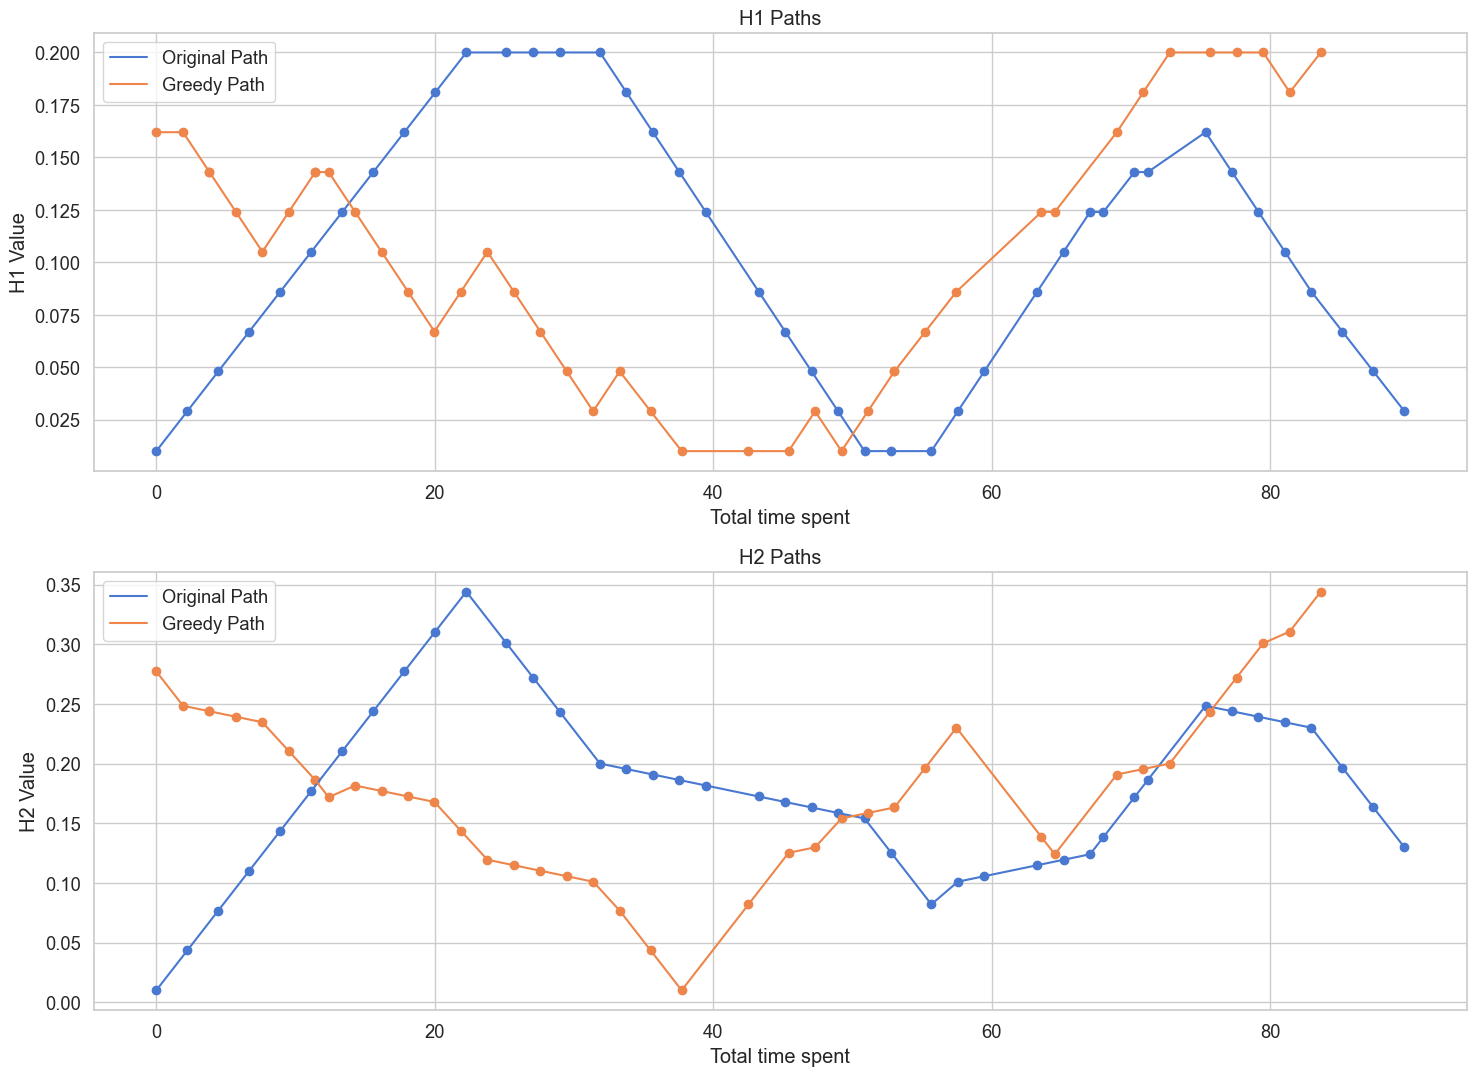

Original Sequence Total Time: 89.64
Greedy Path Total Time: 83.63333


In [101]:
plt.subplots(2,1, figsize=(15, 11))

for i in range(2):
    
    greedy_h = [h[i] for h in orig_space_greedy_best_visited_points]
    
    plt.subplot(2,1,i+1)
    # Plotting the paths
    plt.plot(outlier2_removed_df['t'], outlier2_removed_df[f'H{i+1}'], label='Original Path')
    plt.plot(Greedy_time, greedy_h, label='Greedy Path')

    # Plotting dots on the datapoints
    plt.scatter(outlier2_removed_df['t'], outlier2_removed_df[f'H{i+1}'])
    plt.scatter(Greedy_time, greedy_h)


    plt.xlabel('Total time spent')
    plt.ylabel(f'H{i+1} Value')
    plt.title(f'H{i+1} Paths')
    plt.legend()

plt.tight_layout()
plt.show()

print(f"Original Sequence Total Time: {outlier2_removed_df['t'].iloc[-1]}")
print(f'Greedy Path Total Time: {orig_space_greedy_best_total_time}')

### Regarding the (H1,H2) space

As mentioned before, One could hypothesise a method that could be performed to quantify how well the N generated (H1,H2) points covers the original (H1,H2) space, This hypothesised method is as follows:
 1. Use the **old** fitted model (4th Polynomial) to predict $c_\text{total}$ with the newly N generated (H1,H2) values as input.
 
 2. Use these predicted values along with the N generated (H1,H2) values to _fit_  a new model (4th Polynomial).
 
 3. Use scipy.minimize() to find the optimal (H1,H2) values.
 
 4. Calculate the percentage of "error" between the newly found optimal (H1,H2) values using a new model and the old _original_ optimal (H1,H2) values, which could somehow give us a rough indication of the difference in the (H1,H2) distribution between the one provided and the one generated. 
 
 5. This percentage of error along with the percentage of reduction in time, would help us find the ideal compromise for this problem.

**However**, upon inspection, it became evident that this method is not reliable as this very much introduces **Data Leakage**, because the new model would inadvertently learn patterns of the original (H1,H2) distribution through the prediction of the model from P1. Thus, this method is **omitted**.

Thus, the _coverage_ of the generated (H1,H2) will rely solely on visual inspection, where there are in fact some visual similarities.

**Note:** One could instead try to sample the N discrete (H1,H2) points using a more sophisticated approach. For instance, inspecting the Histogram frequency distribution from the original (H1,H2) and sample H1 and H2 according to their observed frequency distribution.

In [102]:
#q5_X_train = results_per_algo['Greedy']['Sequence']
#q5_y_train = p1_best_model.predict(q5_X_train)

#new_model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Fit the model with all the data
#new_model.fit(X_train, y_train)

#initial_guess = [0.02, 0.1]  

#def objective_function(x):
#    ctotal_pred = new_model.predict([[x[0], x[1]]])
#    return ctotal_pred[0] 


#q5_result = minimize(objective_function, initial_guess, constraints=constraints)
#q5_optimized_values = q5_result.x
#q5_lowest_c_total = q5_result.fun

#print("Optimized Values for H1,H2:", q5_optimized_values)
#print("Lowest C_total:", q5_lowest_c_total)


# Q5 result

In [103]:
#results_per_algo['Greedy']

#### Populating the Q5 sheet:


In [104]:
Q5_result = pd.DataFrame(results_per_algo['Greedy']['Sequence'], columns=['H1', 'H2'])
Q5_result.insert(0, 't', results_per_algo['Greedy']['Time Sequence'])

In [105]:
Q5_result

t      H1      H2
0    0.00000  0.0166  0.1535
1    1.66667  0.0231  0.1285
2    2.50667  0.0297  0.1159
3    5.77667  0.0624  0.1490
4    7.23667  0.0690  0.1709
5    8.54667  0.0559  0.1806
6   11.28667  0.0821  0.2217
7   12.16667  0.0886  0.2085
8   15.44667  0.1214  0.1969
9   16.09667  0.1279  0.1901
10  17.01000  0.1345  0.1764
11  18.32000  0.1476  0.1677
12  20.22000  0.1541  0.1962
13  21.36667  0.1607  0.2134
14  22.66667  0.1672  0.2329
15  24.25333  0.1803  0.2091
16  26.22333  0.2000  0.2067
17  29.83667  0.1869  0.2609
18  31.03000  0.1934  0.2788
19  32.99000  0.1738  0.2869
20  36.84333  0.1410  0.2291
21  41.54333  0.1148  0.1586
22  43.13667  0.1083  0.1347
23  43.79667  0.1017  0.1279
24  44.44667  0.0952  0.1257
25  47.59333  0.0755  0.0785
26  50.21333  0.0493  0.0577
27  50.86333  0.0428  0.0652
28  51.52333  0.0362  0.0587
29  54.14333  0.0100  0.0639

In [106]:
#write_excel(file_path,'Q5', Q5_result)